In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder

#printing all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Suppressing warnings
import warnings
warnings.simplefilter(action = "ignore")


In [2]:
#Importing cleaned datasets
hse = pd.read_csv("./Datasets/Cleaned_HSE.csv", index_col = 0)
hse = hse.reset_index(drop=True)

ab = pd.read_csv("./Datasets/Cleaned_AlphaBeta.csv", index_col = 0)
ab = ab.reset_index(drop=True)

formdata = pd.read_csv("./Datasets/Cleaned_formdata.csv", index_col = 0)
formdata = formdata.reset_index(drop=True)

named_crew_participation = pd.read_csv("./Datasets/Cleaned_named_crew_participation.csv", index_col = 0)
named_crew_participation = named_crew_participation.reset_index(drop=True)

POB_HSE = pd.read_csv("./Datasets/Cleaned_POB_HSE.csv", index_col = 0)
POB_HSE = POB_HSE.reset_index(drop=True)

hse.head()
ab.head()
formdata.head()
named_crew_participation.head()
POB_HSE.head()



,Date,Rig Name,Form ID,Event Description,IADC Injury Classification,year,month,month_name,day,day_name,year_month
0,2022-03-10,Noble Tom Madden,20220310111010,"On 10-Mar-2022 at 0730 hrs., the drill crew wa...",First Aid Incident,2022,3,March,10,Thursday,2022-03
1,2022-02-26,Noble Tom Madden,20220227060042,?A JSL Roustabout reported tothe rigdoctor and...,First Aid Incident,2022,2,February,26,Saturday,2022-02
2,2022-01-17,Noble Globetrotter I,20220117074905,?An employee reported to the Medic with a smal...,First Aid Incident,2022,1,January,17,Monday,2022-01
3,2022-01-01,Noble Sam Croft,20220101100936,?A catering employee reported to his superviso...,First Aid Incident,2022,1,January,1,Saturday,2022-01
4,2022-01-05,Noble Don Taylor,20220105222836,While manually handling a piece of metal grati...,First Aid Incident,2022,1,January,5,Wednesday,2022-01


,Rig,Category,Company,Position,Alpha,Beta,Days_Worked,Total_Cards,Processed_Date,year,month,month_name,day,day_name,year_month
0,Noble Bob Douglas,Operator Services,Halliburton,Data Engineer,-1.542964,0.0,71,0,2021-01-01,2021,1,January,1,Friday,2021-01
1,Noble Regina Allen,Noble National,Noble,Painter,-1.542964,0.0,21,0,2021-01-01,2021,1,January,1,Friday,2021-01
2,Noble Regina Allen,Operator Services,Other,OTSL,-1.542964,0.0,14,0,2021-01-01,2021,1,January,1,Friday,2021-01
3,Noble Tom Madden,Noble Personnel,Noble,Rig Maintenance Supervisor,-1.542964,0.0,45,0,2021-01-01,2021,1,January,1,Friday,2021-01
4,Noble Tom Madden,Operator Services,MI Swaco,Es Specialist,-1.542964,0.0,17,0,2021-01-01,2021,1,January,1,Friday,2021-01


,Rig,Rig_Area,Submission_Date,Shift,Department,Risk_Level,Unsafe_Action,Unsafe_Condition,Unsafe_Condition_Corrected,User_Type,...,iHazard_Description,iAction_Taken,Translation_Status,Translation_ts,year,month,month_name,day,day_name,year_month
0,Noble Lloyd Noble,1,2020-10-06,D,7,Medium,1,0,1,Noble,...,1,1,1,2021-02-19 12:16:30.313,2020,10,October,6,Tuesday,2020-10
1,Noble Lloyd Noble,23,2020-10-08,N,8,High,0,0,1,Noble,...,1,1,1,2021-02-19 12:16:30.937,2020,10,October,8,Thursday,2020-10
2,Noble Lloyd Noble,24,2020-10-09,D,4,High,0,1,1,Noble,...,1,1,1,2021-02-19 12:16:30.327,2020,10,October,9,Friday,2020-10
3,Noble Sam Hartley,24,2020-10-11,D,9,Low,0,0,0,Noble,...,1,1,1,2021-02-19 12:17:08.803,2020,10,October,11,Sunday,2020-10
4,Noble Mick O'Brien,23,2020-10-12,D,9,Low,0,0,1,Noble,...,1,1,1,2021-02-19 12:17:19.483,2020,10,October,12,Monday,2020-10


,RowId,Date,Rig_Name,Category,Company,Count,year,month,month_name,day,day_name
0,110610,2021-01-01,NBD,Catering,JSL,0,2021,1,January,1,Friday
1,111832,2021-01-01,NRL,Noble National,NOBLE,0,2021,1,January,1,Friday
2,111831,2021-01-01,NRL,Noble National,NOBLE,0,2021,1,January,1,Friday
3,111830,2021-01-01,NRL,Noble National,NOBLE,1,2021,1,January,1,Friday
4,111829,2021-01-01,NRL,Noble National,NOBLE,1,2021,1,January,1,Friday


,Rig,Crew_Category,Rig_Type,Operator,Region,Date,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,Position,Well Name
0,Noble Don Taylor,Noble National,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00,145074.0,NOBLE,2020-09-04 09:00:00,2020-10-29 00:00:00,2c9e809374c719140174e2b13f480c28,2020-10-02 00:14:04.667,2022-01-17 16:08:15.950,Roustabout,LIZ-3P21
1,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00,401300.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f600c2a,2020-10-02 00:14:04.180,2022-01-17 16:08:15.950,Globe Riser-Technician,LIZ-3P21
2,Noble Don Taylor,Operator,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00,400565.0,ExxonMobil,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f650c2c,2020-10-02 00:14:04.400,2022-01-17 16:08:15.950,Ops Supervisor,LIZ-3P21
3,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00,401301.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f6a0c2e,2020-10-02 00:14:04.993,2022-01-17 16:08:15.950,Globe Riser-Technician,LIZ-3P21
4,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01 00:00:00,401202.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f700c30,2020-10-02 00:14:04.587,2022-01-17 16:08:15.950,Techniocian,LIZ-3P21


**Manipulations with the Health Safety Environment (HSE) dataset.**

In [3]:
hse.head()
hse.shape

,Date,Rig Name,Form ID,Event Description,IADC Injury Classification,year,month,month_name,day,day_name,year_month
0,2022-03-10,Noble Tom Madden,20220310111010,"On 10-Mar-2022 at 0730 hrs., the drill crew wa...",First Aid Incident,2022,3,March,10,Thursday,2022-03
1,2022-02-26,Noble Tom Madden,20220227060042,?A JSL Roustabout reported tothe rigdoctor and...,First Aid Incident,2022,2,February,26,Saturday,2022-02
2,2022-01-17,Noble Globetrotter I,20220117074905,?An employee reported to the Medic with a smal...,First Aid Incident,2022,1,January,17,Monday,2022-01
3,2022-01-01,Noble Sam Croft,20220101100936,?A catering employee reported to his superviso...,First Aid Incident,2022,1,January,1,Saturday,2022-01
4,2022-01-05,Noble Don Taylor,20220105222836,While manually handling a piece of metal grati...,First Aid Incident,2022,1,January,5,Wednesday,2022-01


(242, 11)

In [4]:
# #Code to use for OneHot Encoder
# from sklearn.preprocessing import OneHotEncoder

# #getting the column we wish to transform
# injury_type = hse[["IADC Injury Classification"]]

# cat_encoder = OneHotEncoder(sparse=False,drop=None,
#                             handle_unknown='ignore') #drop="first"

# #perform one-hot encoding on 'injury_type' column 
# injury_type_1hot = pd.DataFrame(cat_encoder.fit_transform(injury_type))

# cat_encoder.get_feature_names()
# injury_type_1hot.shape

# #merge one-hot encoded columns back with original DataFrame
# hse = hse.join(injury_type_1hot)

# #renaming one hot encoding columns 
# hse = hse.rename(columns={0:"Evaluation Only", 1: "First Aid Incident", 
#                           2: "Medical Treatment Only", 
#                           3: "No IADC Injury Classification", 
#                           4: "Restricted Work Incident"})

# #drop column we hot encoded to not have multicollinearity issues
# hse = hse.drop(columns={"IADC Injury Classification"})
# hse.shape
# hse

In [5]:
# create new dataframe with the columns we need
df_hse_year_month = hse.groupby(["Rig Name","year","year_month"]).size().reset_index()
df_hse_year_month = df_hse_year_month.rename(columns = {0:"Events_per_month"})
#df_hse_year_month = df_hse_year_month.sort_values(by=["Rig Name"])
df_hse_year_month = df_hse_year_month.reset_index(drop=True)
df_hse_year_month["year"] = df_hse_year_month["year"].astype(int)
df_hse_year_month

# df_hse_year = hse.groupby(["Rig Name","year"]).size().reset_index()
# df_hse_year = df_hse_year.rename(columns = {0:"Events_per_month"})
# df_hse_year = df_hse_year.sort_values(by=["Rig Name"])
# df_hse_year = df_hse_year.reset_index(drop=True)
# df_hse_year["year"] = df_hse_year["year"].astype(int)
# df_hse_year.head()



,Rig Name,year,year_month,Events_per_month
0,Noble Bob Douglas,2020,2020-11,2
1,Noble Bob Douglas,2020,2020-12,1
2,Noble Bob Douglas,2021,2021-01,1
3,Noble Bob Douglas,2021,2021-05,1
4,Noble Bob Douglas,2021,2021-09,3
...,...,...,...,...
137,Noble Tom Prosser,2021,2021-11,2
138,Noble Tom Prosser,2021,2021-12,2
139,Noble Tom Prosser,2022,2022-01,1
140,Noble Tom Prosser,2022,2022-02,1


To add Injury types run below code

In [6]:
# injuries_level = hse.copy()

# injuries_level =  hse.groupby(["Rig Name","year","year_month"], as_index=False).sum()
# injuries_level["year"] = injuries_level["year"].astype(int)

# injuries_level = injuries_level[["Rig Name","year","year_month",'Evaluation Only',
#                                  'First Aid Incident','Medical Treatment Only',
#                                  'No IADC Injury Classification','Restricted Work Incident']]
# injuries_level



In [7]:
# #merge the two tables together adding the total report 120d
# df_hse_year_month = pd.merge(df_hse_year_month,injuries_level,  how='left', left_on=['Rig Name','year','year_month'], right_on = ['Rig Name','year','year_month'])

# df_hse_year_month.head()


**Manipulations with the People on Board Health Safety Environment (POB_HSE) dataset.**

In [8]:
#Convert Date column to datetime type for easier manipulations 
POB_HSE['Date']= pd.to_datetime(POB_HSE['Date'])

#Extract year and add it to new column
#POB_HSE['date_year_month'] = pd.to_datetime(POB_HSE['Date']).dt.strftime('%b-%Y')
POB_HSE['date_year_month'] = pd.to_datetime(POB_HSE['Date']).dt.strftime('%Y-%m')
POB_HSE['date_year'] = pd.to_datetime(POB_HSE['Date']).dt.year
POB_HSE['date_month'] = pd.to_datetime(POB_HSE['Date']).dt.month
POB_HSE['date_month_name'] = pd.to_datetime(POB_HSE['Date']).dt.month_name()

POB_HSE.head()


,Rig,Crew_Category,Rig_Type,Operator,Region,Date,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,Position,Well Name,date_year_month,date_year,date_month,date_month_name
0,Noble Don Taylor,Noble National,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01,145074.0,NOBLE,2020-09-04 09:00:00,2020-10-29 00:00:00,2c9e809374c719140174e2b13f480c28,2020-10-02 00:14:04.667,2022-01-17 16:08:15.950,Roustabout,LIZ-3P21,2020-10,2020,10,October
1,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01,401300.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f600c2a,2020-10-02 00:14:04.180,2022-01-17 16:08:15.950,Globe Riser-Technician,LIZ-3P21,2020-10,2020,10,October
2,Noble Don Taylor,Operator,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01,400565.0,ExxonMobil,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f650c2c,2020-10-02 00:14:04.400,2022-01-17 16:08:15.950,Ops Supervisor,LIZ-3P21,2020-10,2020,10,October
3,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01,401301.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f6a0c2e,2020-10-02 00:14:04.993,2022-01-17 16:08:15.950,Globe Riser-Technician,LIZ-3P21,2020-10,2020,10,October
4,Noble Don Taylor,Noble Services,DS,ESSO Exploration and Production Guyana Limited,South America,2020-10-01,401202.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f700c30,2020-10-02 00:14:04.587,2022-01-17 16:08:15.950,Techniocian,LIZ-3P21,2020-10,2020,10,October


In [9]:
POB_HSE.shape

(1087109, 19)

### One Hot Encoding for Rig Type

In [10]:
#Code to use for OneHot Encoder
from sklearn.preprocessing import OneHotEncoder

#getting the column we wish to transform
rig_type = POB_HSE[["Rig_Type"]]

cat_encoder = OneHotEncoder(sparse=False, drop=None, 
                            handle_unknown='ignore') #drop="first"

#perform one-hot encoding on 'rig type' column 
rig_type_1hot = pd.DataFrame(cat_encoder.fit_transform(rig_type))
cat_encoder.get_feature_names()
rig_type_1hot.shape
rig_type_1hot


array(['x0_DS', 'x0_JU', 'x0_NPSS'], dtype=object)

(1087109, 3)

,0,1,2
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1087104,0.0,1.0,0.0
1087105,0.0,1.0,0.0
1087106,0.0,1.0,0.0
1087107,0.0,1.0,0.0


In [11]:
#renaming one hot encoding columns 
rig_type_1hot = rig_type_1hot.rename(columns={0:"DS", 1:"JU", 2:"NPSS"})


### One Hot Encoding for Crew Category

In [12]:
#getting the column we wish to transform
crew_category = POB_HSE[["Crew_Category"]]

cat_encoder = OneHotEncoder(sparse=False, drop=None, 
                            handle_unknown='ignore') #drop="first"

#perform one-hot encoding on 'rig type' column 
crew_category_1hot = pd.DataFrame(cat_encoder.fit_transform(crew_category))
cat_encoder.get_feature_names()
crew_category_1hot.shape
crew_category_1hot


array(['x0_Catering', 'x0_Noble Expat', 'x0_Noble National',
       'x0_Noble Personnel', 'x0_Noble Services', 'x0_Operator',
       'x0_Operator Operations', 'x0_Operator Services', 'x0_Other'],
      dtype=object)

(1087109, 9)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1087104,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1087105,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1087106,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1087107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
#renaming one hot encoding columns 
crew_category_1hot = crew_category_1hot.rename(columns={0:"Catering", 1:"Noble_Expat",
                                                        2:"Noble_National",
                                                        3:"Noble_Personnel",
                                                        4:"Noble_Services",
                                                        5:"Cat_Type_Operator",
                                                        6:"Operator_Operations",
                                                        7:"Operator_Services",
                                                        8:"Other"})


### One Hot Encoding for Region

In [14]:
#getting the column we wish to transform
pob_region = POB_HSE[["Region"]]

cat_encoder = OneHotEncoder(sparse=False, drop=None, 
                            handle_unknown='ignore') #drop="first"

#perform one-hot encoding on 'rig type' column 
pob_region_1hot = pd.DataFrame(cat_encoder.fit_transform(pob_region))
cat_encoder.get_feature_names()
pob_region_1hot.shape
pob_region_1hot


array(['x0_Europe and Mediterranean', 'x0_Far East',
       'x0_Middle East and India', 'x0_Oceania', 'x0_South America',
       'x0_United States'], dtype=object)

(1087109, 6)

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1087104,0.0,0.0,0.0,1.0,0.0,0.0
1087105,0.0,0.0,0.0,1.0,0.0,0.0
1087106,0.0,0.0,0.0,1.0,0.0,0.0
1087107,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
#renaming one hot encoding columns 
pob_region_1hot = pob_region_1hot.rename(columns={0:"Europe_and_Mediterranean", 
                                                  1:"Far_East",
                                                  2:"Middle_East_and_India",
                                                  3:"Oceania", 4:"South_America",
                                                  5:"United_States"})


### Merge the OHE columns with the dataframe

In [16]:
#make a copy of the main df
extra_df = POB_HSE.copy()

#merge one-hot encoded columns back with original DataFrame
extra_df = pd.merge(extra_df, rig_type_1hot, left_index=True, right_index=True)
extra_df = pd.merge(extra_df, crew_category_1hot, left_index=True, right_index=True)
extra_df = pd.merge(extra_df, pob_region_1hot, left_index=True, right_index=True)

#drop column we hot encoded to not have multicollinearity issues
extra_df = extra_df.drop(columns={"Rig_Type","Crew_Category","Region"})
extra_df.shape
extra_df.head()



(1087109, 34)

,Rig,Operator,Date,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,...,Cat_Type_Operator,Operator_Operations,Operator_Services,Other,Europe_and_Mediterranean,Far_East,Middle_East_and_India,Oceania,South_America,United_States
0,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,145074.0,NOBLE,2020-09-04 09:00:00,2020-10-29 00:00:00,2c9e809374c719140174e2b13f480c28,2020-10-02 00:14:04.667,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401300.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f600c2a,2020-10-02 00:14:04.180,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,400565.0,ExxonMobil,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f650c2c,2020-10-02 00:14:04.400,2022-01-17 16:08:15.950,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401301.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f6a0c2e,2020-10-02 00:14:04.993,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401202.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f700c30,2020-10-02 00:14:04.587,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Company: Noble or not 

In [17]:
extra_df["Company"] = extra_df["Company"].replace("Noble Drilling","NOBLE")
extra_df["Noble_Company"] = np.where(extra_df["Company"]== "NOBLE", 1, 0)
extra_df.head()
extra_df.shape

,Rig,Operator,Date,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,...,Operator_Operations,Operator_Services,Other,Europe_and_Mediterranean,Far_East,Middle_East_and_India,Oceania,South_America,United_States,Noble_Company
0,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,145074.0,NOBLE,2020-09-04 09:00:00,2020-10-29 00:00:00,2c9e809374c719140174e2b13f480c28,2020-10-02 00:14:04.667,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401300.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f600c2a,2020-10-02 00:14:04.180,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,400565.0,ExxonMobil,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f650c2c,2020-10-02 00:14:04.400,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401301.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f6a0c2e,2020-10-02 00:14:04.993,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401202.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f700c30,2020-10-02 00:14:04.587,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


(1087109, 35)

### Position: Rig Manager or not

In [18]:
extra_df["Rig_Manager"] = np.where(extra_df["Position"]== "Rig Manager", 1, 0)
extra_df.head()
extra_df.shape

,Rig,Operator,Date,WorkdayId,Company,ArrivalDate,DepartureDate,POB_UID,Last_Edit_Date,Inserted_TS,...,Operator_Services,Other,Europe_and_Mediterranean,Far_East,Middle_East_and_India,Oceania,South_America,United_States,Noble_Company,Rig_Manager
0,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,145074.0,NOBLE,2020-09-04 09:00:00,2020-10-29 00:00:00,2c9e809374c719140174e2b13f480c28,2020-10-02 00:14:04.667,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
1,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401300.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f600c2a,2020-10-02 00:14:04.180,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,400565.0,ExxonMobil,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f650c2c,2020-10-02 00:14:04.400,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
3,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401301.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f6a0c2e,2020-10-02 00:14:04.993,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,Noble Don Taylor,ESSO Exploration and Production Guyana Limited,2020-10-01,401202.0,Other,2020-09-30 07:10:00,2020-11-30 00:00:00,2c9e809374c719140174e2b13f700c30,2020-10-02 00:14:04.587,2022-01-17 16:08:15.950,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


(1087109, 36)

In [19]:
#need to convert WorkdayId column into string

POB_HSE["WorkdayId"] = POB_HSE["WorkdayId"].astype(str)

# create new dataframe with the columns we need
df_pob_hse_year_month = POB_HSE.groupby(["Rig","date_year","date_year_month"]).size().reset_index()
df_pob_hse_year_month = df_pob_hse_year_month.rename(columns = {0:"Working_Days_per_month"})
df_pob_hse_year_month = df_pob_hse_year_month.reset_index(drop=True)
df_pob_hse_year_month.head()



,Rig,date_year,date_year_month,Working_Days_per_month
0,Noble Bob Douglas,2020,2020-10,5821
1,Noble Bob Douglas,2020,2020-11,5670
2,Noble Bob Douglas,2020,2020-12,5938
3,Noble Bob Douglas,2021,2021-01,5686
4,Noble Bob Douglas,2021,2021-02,5088


In [20]:
#TO ADD THE OHE COLUMNS

#pob_ohe_columns = POB_HSE.copy()

extra_df =  extra_df.groupby(["Rig","date_year","date_year_month"], as_index=False).sum()
extra_df["date_year"] = extra_df["date_year"].astype(int)

# pob_ohe_columns = pob_ohe_columns[["Rig","date_year","date_year_month",'JU','DS',
#                                    'NPSS',"Catering","Noble_Expat","Noble_National",
#                                    "Noble_Personnel","Noble_Services","Cat_Type_Operator",
#                                    "Operator_Operations","Operator_Services","Other"]]
# pob_ohe_columns

extra_df = extra_df.drop(columns={"date_month"})

extra_df



,Rig,date_year,date_year_month,DS,JU,NPSS,Catering,Noble_Expat,Noble_National,Noble_Personnel,...,Operator_Services,Other,Europe_and_Mediterranean,Far_East,Middle_East_and_India,Oceania,South_America,United_States,Noble_Company,Rig_Manager
0,Noble Bob Douglas,2020,2020-10,5821.0,0.0,0.0,583.0,1255.0,734.0,918.0,...,1873.0,0.0,0.0,0.0,0.0,0.0,5821.0,0.0,2883,31
1,Noble Bob Douglas,2020,2020-11,5670.0,0.0,0.0,523.0,1099.0,711.0,951.0,...,2007.0,0.0,0.0,0.0,0.0,0.0,5670.0,0.0,2731,30
2,Noble Bob Douglas,2020,2020-12,5938.0,0.0,0.0,528.0,1229.0,644.0,966.0,...,2089.0,1.0,0.0,0.0,0.0,0.0,5938.0,0.0,2822,31
3,Noble Bob Douglas,2021,2021-01,5686.0,0.0,0.0,534.0,1191.0,704.0,978.0,...,1844.0,0.0,0.0,0.0,0.0,0.0,5686.0,0.0,2873,31
4,Noble Bob Douglas,2021,2021-02,5088.0,0.0,0.0,503.0,1053.0,759.0,776.0,...,1646.0,0.0,0.0,0.0,0.0,0.0,5088.0,0.0,2559,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,0.0,3595.0,0.0,343.0,166.0,31.0,1456.0,...,1332.0,0.0,0.0,0.0,0.0,3595.0,0.0,0.0,1652,30
342,Noble Tom Prosser,2021,2021-12,0.0,2102.0,0.0,197.0,77.0,246.0,1080.0,...,247.0,120.0,0.0,0.0,0.0,2102.0,0.0,0.0,1461,32
343,Noble Tom Prosser,2022,2022-01,0.0,2912.0,0.0,247.0,1.0,237.0,1228.0,...,775.0,191.0,0.0,0.0,0.0,2912.0,0.0,0.0,1644,31
344,Noble Tom Prosser,2022,2022-02,0.0,2670.0,0.0,102.0,21.0,207.0,1146.0,...,778.0,251.0,0.0,0.0,0.0,2670.0,0.0,0.0,1518,28


In [21]:
# #merge the two tables together adding the total report 120d
# df_pob_hse_year_month = pd.merge(df_pob_hse_year_month,pob_ohe_columns,  how='left', 
#                                  left_on=['Rig','date_year','date_year_month'], 
#                                  right_on = ['Rig','date_year','date_year_month'])

# df_pob_hse_year_month.head()
# df_pob_hse_year_month.shape

extra_df_pob_hse_year_month = df_pob_hse_year_month.copy()

#merge the two tables together adding the total report 120d
extra_df_pob_hse_year_month = pd.merge(df_pob_hse_year_month,extra_df, how='left', 
                                 left_on=['Rig','date_year','date_year_month'], 
                                 right_on = ['Rig','date_year','date_year_month'])

extra_df_pob_hse_year_month.head()
extra_df_pob_hse_year_month.shape


,Rig,date_year,date_year_month,Working_Days_per_month,DS,JU,NPSS,Catering,Noble_Expat,Noble_National,...,Operator_Services,Other,Europe_and_Mediterranean,Far_East,Middle_East_and_India,Oceania,South_America,United_States,Noble_Company,Rig_Manager
0,Noble Bob Douglas,2020,2020-10,5821,5821.0,0.0,0.0,583.0,1255.0,734.0,...,1873.0,0.0,0.0,0.0,0.0,0.0,5821.0,0.0,2883,31
1,Noble Bob Douglas,2020,2020-11,5670,5670.0,0.0,0.0,523.0,1099.0,711.0,...,2007.0,0.0,0.0,0.0,0.0,0.0,5670.0,0.0,2731,30
2,Noble Bob Douglas,2020,2020-12,5938,5938.0,0.0,0.0,528.0,1229.0,644.0,...,2089.0,1.0,0.0,0.0,0.0,0.0,5938.0,0.0,2822,31
3,Noble Bob Douglas,2021,2021-01,5686,5686.0,0.0,0.0,534.0,1191.0,704.0,...,1844.0,0.0,0.0,0.0,0.0,0.0,5686.0,0.0,2873,31
4,Noble Bob Douglas,2021,2021-02,5088,5088.0,0.0,0.0,503.0,1053.0,759.0,...,1646.0,0.0,0.0,0.0,0.0,0.0,5088.0,0.0,2559,32


(346, 24)

**Merging datasets together**

In [22]:
# merge together the two dataframes
full_pob_hse_year_month = pd.merge(df_pob_hse_year_month,df_hse_year_month,  how='left', left_on=['Rig','date_year','date_year_month'], right_on = ['Rig Name','year','year_month'])
full_pob_hse_year_month = full_pob_hse_year_month.drop(columns=["Rig Name","year","year_month"])
full_pob_hse_year_month["Working_Days_per_month"] = full_pob_hse_year_month["Working_Days_per_month"].fillna(0)
full_pob_hse_year_month["Working_Days_per_month"] = full_pob_hse_year_month["Working_Days_per_month"].astype(int)
full_pob_hse_year_month["Events_per_month"] = full_pob_hse_year_month["Events_per_month"].fillna(0)
full_pob_hse_year_month["Events_per_month"] = full_pob_hse_year_month["Events_per_month"].astype(int)

#fill NAN values for the injury types as if incidents = 0 then injury types should
# be 0 too 

# full_pob_hse_year_month["Evaluation Only"] = full_pob_hse_year_month["Evaluation Only"].fillna(0)
# full_pob_hse_year_month["First Aid Incident"] = full_pob_hse_year_month["First Aid Incident"].fillna(0)
# full_pob_hse_year_month["Medical Treatment Only"] = full_pob_hse_year_month["Medical Treatment Only"].fillna(0)
# full_pob_hse_year_month["No IADC Injury Classification"] = full_pob_hse_year_month["No IADC Injury Classification"].fillna(0)
# full_pob_hse_year_month["Restricted Work Incident"] = full_pob_hse_year_month["Restricted Work Incident"].fillna(0)

full_pob_hse_year_month = full_pob_hse_year_month.rename(columns={"date_year":"year", "date_year_month":"month_year"})
full_pob_hse_year_month.head()



,Rig,year,month_year,Working_Days_per_month,Events_per_month
0,Noble Bob Douglas,2020,2020-10,5821,0
1,Noble Bob Douglas,2020,2020-11,5670,2
2,Noble Bob Douglas,2020,2020-12,5938,1
3,Noble Bob Douglas,2021,2021-01,5686,1
4,Noble Bob Douglas,2021,2021-02,5088,0


### Merge the extra df 

In [23]:
# merge together the two dataframes
full_extra_pob_hse_year_month = pd.merge(extra_df_pob_hse_year_month,df_hse_year_month,  how='left', left_on=['Rig','date_year','date_year_month'], right_on = ['Rig Name','year','year_month'])
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns=["Rig Name","year","year_month"])
full_extra_pob_hse_year_month["Working_Days_per_month"] = full_extra_pob_hse_year_month["Working_Days_per_month"].fillna(0)
full_extra_pob_hse_year_month["Working_Days_per_month"] = full_extra_pob_hse_year_month["Working_Days_per_month"].astype(int)
full_extra_pob_hse_year_month["Events_per_month"] = full_extra_pob_hse_year_month["Events_per_month"].fillna(0)
full_extra_pob_hse_year_month["Events_per_month"] = full_extra_pob_hse_year_month["Events_per_month"].astype(int)

#fill NAN values for the injury types as if incidents = 0 then injury types should
# be 0 too 

# full_pob_hse_year_month["Evaluation Only"] = full_pob_hse_year_month["Evaluation Only"].fillna(0)
# full_pob_hse_year_month["First Aid Incident"] = full_pob_hse_year_month["First Aid Incident"].fillna(0)
# full_pob_hse_year_month["Medical Treatment Only"] = full_pob_hse_year_month["Medical Treatment Only"].fillna(0)
# full_pob_hse_year_month["No IADC Injury Classification"] = full_pob_hse_year_month["No IADC Injury Classification"].fillna(0)
# full_pob_hse_year_month["Restricted Work Incident"] = full_pob_hse_year_month["Restricted Work Incident"].fillna(0)

full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.rename(columns={"date_year":"year", "date_year_month":"month_year"})
full_extra_pob_hse_year_month.head()



,Rig,year,month_year,Working_Days_per_month,DS,JU,NPSS,Catering,Noble_Expat,Noble_National,...,Other,Europe_and_Mediterranean,Far_East,Middle_East_and_India,Oceania,South_America,United_States,Noble_Company,Rig_Manager,Events_per_month
0,Noble Bob Douglas,2020,2020-10,5821,5821.0,0.0,0.0,583.0,1255.0,734.0,...,0.0,0.0,0.0,0.0,0.0,5821.0,0.0,2883,31,0
1,Noble Bob Douglas,2020,2020-11,5670,5670.0,0.0,0.0,523.0,1099.0,711.0,...,0.0,0.0,0.0,0.0,0.0,5670.0,0.0,2731,30,2
2,Noble Bob Douglas,2020,2020-12,5938,5938.0,0.0,0.0,528.0,1229.0,644.0,...,1.0,0.0,0.0,0.0,0.0,5938.0,0.0,2822,31,1
3,Noble Bob Douglas,2021,2021-01,5686,5686.0,0.0,0.0,534.0,1191.0,704.0,...,0.0,0.0,0.0,0.0,0.0,5686.0,0.0,2873,31,1
4,Noble Bob Douglas,2021,2021-02,5088,5088.0,0.0,0.0,503.0,1053.0,759.0,...,0.0,0.0,0.0,0.0,0.0,5088.0,0.0,2559,32,0


In [24]:
#each rig should appear 18 times. If not add a row with missing one and add 0 as value. 
from collections import Counter
Counter(full_pob_hse_year_month["Rig"])

    

Counter({'Noble Bob Douglas': 18,
         'Noble Clyde Boudreaux': 18,
         'Noble Don Taylor': 18,
         'Noble Faye Kozack': 9,
         'Noble Gerry de Souza': 7,
         'Noble Globetrotter I': 18,
         'Noble Globetrotter II': 18,
         'Noble Hans Deul': 15,
         'Noble Houston Colbert': 18,
         'Noble Joe Knight': 14,
         'Noble Johnny Whitstine': 14,
         'Noble Lloyd Noble': 18,
         "Noble Mick O'Brien": 18,
         'Noble Regina Allen': 18,
         'Noble Roger Lewis': 14,
         'Noble Sam Croft': 18,
         'Noble Sam Hartley': 18,
         'Noble Sam Turner': 18,
         'Noble Scott Marks': 14,
         'Noble Stanley Lafosse': 7,
         'Noble Tom Madden': 18,
         'Noble Tom Prosser': 18})

In [25]:
from functions import rolling_120d

full_pob_hse_year_month = rolling_120d(full_pob_hse_year_month)

full_pob_hse_year_month.head(20)
full_pob_hse_year_month.shape


,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d
0,Noble Bob Douglas,2020,2020-10,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0
5,Noble Bob Douglas,2021,2021-03,16712.0,2.0
6,Noble Bob Douglas,2021,2021-04,16506.0,1.0
7,Noble Bob Douglas,2021,2021-05,16512.0,0.0
8,Noble Bob Douglas,2021,2021-06,17206.0,1.0
9,Noble Bob Douglas,2021,2021-07,16726.0,1.0


(346, 5)

In [26]:
full_extra_pob_hse_year_month = rolling_120d(full_extra_pob_hse_year_month)


In [27]:
# from functions import share_risk_type
# full_pob_hse_year_month = share_risk_type(full_pob_hse_year_month, "Evaluation Only_120d")
# full_pob_hse_year_month = share_risk_type(full_pob_hse_year_month, "First Aid Incident_120d")
# full_pob_hse_year_month = share_risk_type(full_pob_hse_year_month, "Medical Treatment Only_120d")
# full_pob_hse_year_month = share_risk_type(full_pob_hse_year_month, "No IADC Injury Classification_120d")
# full_pob_hse_year_month = share_risk_type(full_pob_hse_year_month, "Restricted Work Incident_120d")

# full_pob_hse_year_month = full_pob_hse_year_month.drop(columns={"Evaluation Only_120d","First Aid Incident_120d",
#                                               "Medical Treatment Only_120d","No IADC Injury Classification_120d",
#                                              "Restricted Work Incident_120d"})



In [28]:
from functions import share_crew_category
full_extra_pob_hse_year_month = share_crew_category(full_extra_pob_hse_year_month)

full_extra_pob_hse_year_month.head(20)
full_extra_pob_hse_year_month.shape


,Rig,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,...,Events_per_month_120d,Catering_120d_percentage,Noble_Expat_120d_percentage,Noble_National_120d_percentage,Noble_Personnel_120d_percentage,Noble_Services_120d_percentage,Cat_Type_Operator_120d_percentage,Operator_Operations_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,17429.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.093752,0.205577,0.119858,0.162660,0.018418,0.057204,0.0,0.342475,0.000057
4,Noble Bob Douglas,2021,2021-02,17294.0,17294.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.091650,0.203481,0.119059,0.167399,0.021568,0.053313,0.0,0.343472,0.000058
5,Noble Bob Douglas,2021,2021-03,16712.0,16712.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.093645,0.207815,0.126077,0.162757,0.021841,0.053973,0.0,0.333832,0.000060
6,Noble Bob Douglas,2021,2021-04,16506.0,16506.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.094996,0.208530,0.145765,0.157700,0.014177,0.047074,0.0,0.331698,0.000061
7,Noble Bob Douglas,2021,2021-05,16512.0,16512.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.093508,0.203307,0.153464,0.161579,0.007934,0.042878,0.0,0.337270,0.000061
8,Noble Bob Douglas,2021,2021-06,17206.0,17206.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.091131,0.199930,0.151226,0.167209,0.006567,0.038824,0.0,0.345054,0.000058
9,Noble Bob Douglas,2021,2021-07,16726.0,16726.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.092670,0.203097,0.134581,0.189286,0.012137,0.037008,0.0,0.331221,0.000000


(346, 25)

In [29]:
# full_pob_hse_year_month["Evaluation_Only__percentage_120d"] = full_pob_hse_year_month["Evaluation_Only__percentage_120d"].fillna(0)
# full_pob_hse_year_month["First_Aid_Incident_percentage_120d"] = full_pob_hse_year_month["First_Aid_Incident_percentage_120d"].fillna(0)
# full_pob_hse_year_month["Medical_Treatment_Only_percentage_120d"] = full_pob_hse_year_month["Medical_Treatment_Only_percentage_120d"].fillna(0)
# full_pob_hse_year_month["No_IADC_Injury_Classification_percentage_120d"] = full_pob_hse_year_month["No_IADC_Injury_Classification_percentage_120d"].fillna(0)
# full_pob_hse_year_month["Restricted_Work_Incident__percentage_120d"] = full_pob_hse_year_month["Restricted_Work_Incident__percentage_120d"].fillna(0)
# full_pob_hse_year_month.head(60)


In [30]:
# create new column "Incidents_per_day"
full_pob_hse_year_month["Incidents_per_day"] = full_pob_hse_year_month["Events_per_month_120d"]/full_pob_hse_year_month["Working_Days_per_month_120d"]
full_pob_hse_year_month.head()

full_extra_pob_hse_year_month["Incidents_per_day"] = full_extra_pob_hse_year_month["Events_per_month_120d"]/full_pob_hse_year_month["Working_Days_per_month_120d"]
full_extra_pob_hse_year_month.head()



,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231


,Rig,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,...,Catering_120d_percentage,Noble_Expat_120d_percentage,Noble_National_120d_percentage,Noble_Personnel_120d_percentage,Noble_Services_120d_percentage,Cat_Type_Operator_120d_percentage,Operator_Operations_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage,Incidents_per_day
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,17429.0,0.0,0.0,0.0,0.0,0.0,...,0.093752,0.205577,0.119858,0.162660,0.018418,0.057204,0.0,0.342475,0.000057,0.000172
4,Noble Bob Douglas,2021,2021-02,17294.0,17294.0,0.0,0.0,0.0,0.0,0.0,...,0.091650,0.203481,0.119059,0.167399,0.021568,0.053313,0.0,0.343472,0.000058,0.000231


**Manipulations with the ab dataset.**

In [31]:
ab = pd.read_csv("./Datasets/Cleaned_AlphaBeta.csv", index_col = 0)
ab.shape

(937180, 15)

In [32]:
#We only need to keep the first day of the month for each month. This is done 
# for the 2021 dates but not for 2022
ab = ab[ab["day"]==1]
ab = ab.reset_index(drop=True)
ab.shape
ab.head()

(129793, 15)

,Rig,Category,Company,Position,Alpha,Beta,Days_Worked,Total_Cards,Processed_Date,year,month,month_name,day,day_name,year_month
0,Noble Bob Douglas,Operator Services,Halliburton,Data Engineer,-1.542964,0.0,71,0,2021-01-01,2021,1,January,1,Friday,2021-01
1,Noble Regina Allen,Noble National,Noble,Painter,-1.542964,0.0,21,0,2021-01-01,2021,1,January,1,Friday,2021-01
2,Noble Regina Allen,Operator Services,Other,OTSL,-1.542964,0.0,14,0,2021-01-01,2021,1,January,1,Friday,2021-01
3,Noble Tom Madden,Noble Personnel,Noble,Rig Maintenance Supervisor,-1.542964,0.0,45,0,2021-01-01,2021,1,January,1,Friday,2021-01
4,Noble Tom Madden,Operator Services,MI Swaco,Es Specialist,-1.542964,0.0,17,0,2021-01-01,2021,1,January,1,Friday,2021-01


In [33]:
# create new dataframe with the columns we need
ab_year_month = ab.groupby(["Rig","year","year_month"]).size().reset_index()
ab_year_month = ab_year_month.rename(columns = {0:"No_of_Events"})
#ab_year_month = ab_year_month.sort_values(by=["year"])
ab_year_month = ab_year_month.reset_index(drop=True)
ab_year_month


,Rig,year,year_month,No_of_Events
0,Noble Bob Douglas,2021,2021-01,549
1,Noble Bob Douglas,2021,2021-02,610
2,Noble Bob Douglas,2021,2021-03,614
3,Noble Bob Douglas,2021,2021-04,675
4,Noble Bob Douglas,2021,2021-05,660
...,...,...,...,...
301,Noble Tom Prosser,2022,2022-01,629
302,Noble Tom Prosser,2022,2022-02,618
303,Noble Tom Prosser,2022,2022-03,598
304,PMM,2022,2022-02,94


In [34]:
from functions import get_count_injury
ab_year_month['Alpha'] = get_count_injury(ab,"Alpha")
ab_year_month['Alpha'] = ab_year_month["Alpha"]/ab_year_month["No_of_Events"]
ab_year_month['Beta'] = get_count_injury(ab,"Beta")
ab_year_month['Beta'] = ab_year_month["Beta"]/ab_year_month["No_of_Events"]
ab_year_month = ab_year_month.drop(columns={"No_of_Events"})


In [35]:
# create new dataframe with the columns we need
ab_experience = ab.groupby(["Rig","year","year_month"]).sum().reset_index()
ab_experience = ab_experience.drop(columns = {"Alpha","Beta","month","day"})
# ab_experience = ab_experience.reset_index(drop=True)
ab_experience

,Rig,year,year_month,Days_Worked,Total_Cards
0,Noble Bob Douglas,2021,2021-01,17334,0
1,Noble Bob Douglas,2021,2021-02,22489,8
2,Noble Bob Douglas,2021,2021-03,22208,2434
3,Noble Bob Douglas,2021,2021-04,22274,8023
4,Noble Bob Douglas,2021,2021-05,22095,13358
...,...,...,...,...,...
301,Noble Tom Prosser,2022,2022-01,12413,9767
302,Noble Tom Prosser,2022,2022-02,11838,9359
303,Noble Tom Prosser,2022,2022-03,11289,8909
304,PMM,2022,2022-02,1120,46


In [36]:
ab_extra = pd.merge(ab_experience,ab_year_month,  how='left', left_on=['Rig','year','year_month'], right_on = ['Rig','year','year_month'])
ab_extra.shape
ab_extra


(306, 7)

,Rig,year,year_month,Days_Worked,Total_Cards,Alpha,Beta
0,Noble Bob Douglas,2021,2021-01,17334,0,-1.542964,0.000000
1,Noble Bob Douglas,2021,2021-02,22489,8,-1.442546,0.002120
2,Noble Bob Douglas,2021,2021-03,22208,2434,-1.018316,0.270252
3,Noble Bob Douglas,2021,2021-04,22274,8023,-0.706365,0.445779
4,Noble Bob Douglas,2021,2021-05,22095,13358,-0.469006,0.541805
...,...,...,...,...,...,...,...
301,Noble Tom Prosser,2022,2022-01,12413,9767,-0.214469,0.746363
302,Noble Tom Prosser,2022,2022-02,11838,9359,-0.245051,0.715332
303,Noble Tom Prosser,2022,2022-03,11289,8909,-0.268225,0.735051
304,PMM,2022,2022-02,1120,46,-1.114260,0.105109


In [37]:
full_full = pd.merge(full_pob_hse_year_month,ab_year_month,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_full = full_full.drop(columns=["year_month"])
full_full.shape
full_full.head()

#this df has the One Hot Encoded categories
full_extra_pob_hse_year_month = pd.merge(full_extra_pob_hse_year_month,ab_extra,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns=["year_month"])
full_extra_pob_hse_year_month.shape
full_extra_pob_hse_year_month.head()



(346, 8)

,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.00000
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.00212


(346, 30)

,Rig,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,...,Noble_Services_120d_percentage,Cat_Type_Operator_120d_percentage,Operator_Operations_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage,Incidents_per_day,Days_Worked,Total_Cards,Alpha,Beta
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,17429.0,0.0,0.0,0.0,0.0,0.0,...,0.018418,0.057204,0.0,0.342475,0.000057,0.000172,17334.0,0.0,-1.542964,0.00000
4,Noble Bob Douglas,2021,2021-02,17294.0,17294.0,0.0,0.0,0.0,0.0,0.0,...,0.021568,0.053313,0.0,0.343472,0.000058,0.000231,22489.0,8.0,-1.442546,0.00212


In [38]:
x = ab.groupby(["Rig","year","year_month","Position"]).sum().reset_index()
x[x["Position"]=="Rig Manager"]


,Rig,year,year_month,Position,Alpha,Beta,Days_Worked,Total_Cards,month,day
107,Noble Bob Douglas,2021,2021-01,Rig Manager,-4.628892,0.000000,92,0,3,3
285,Noble Bob Douglas,2021,2021-02,Rig Manager,-4.328880,0.000000,120,0,6,3
468,Noble Bob Douglas,2021,2021-03,Rig Manager,-2.447368,1.914825,124,32,9,3
652,Noble Bob Douglas,2021,2021-04,Rig Manager,-1.224419,2.747168,124,84,12,3
837,Noble Bob Douglas,2021,2021-05,Rig Manager,-0.133211,2.921252,124,116,15,3
...,...,...,...,...,...,...,...,...,...,...
38974,Noble Tom Prosser,2021,2021-11,Rig Manager,0.840819,1.704604,120,85,33,3
39103,Noble Tom Prosser,2021,2021-12,Rig Manager,-0.200252,2.005015,120,85,48,4
39231,Noble Tom Prosser,2022,2022-01,Rig Manager,-4.083291,4.285369,121,69,6,6
39363,Noble Tom Prosser,2022,2022-02,Rig Manager,-3.442828,4.974603,121,65,12,6


**Manipulations with the formdata dataset.**

In [39]:
formdata.columns.tolist()

['Rig',
 'Rig_Area',
 'Submission_Date',
 'Shift',
 'Department',
 'Risk_Level',
 'Unsafe_Action',
 'Unsafe_Condition',
 'Unsafe_Condition_Corrected',
 'User_Type',
 'ts',
 'source',
 'source_ref',
 'Upload_By_Id',
 'Positive_Observation',
 'iEmployee_No',
 'iCompany_Name',
 'iCrew_Category',
 'Match_Score',
 'Match_ts',
 'Match_Status',
 'Hazard_Description_Language',
 'Action_Taken_Language',
 'iHazard_Description',
 'iAction_Taken',
 'Translation_Status',
 'Translation_ts',
 'year',
 'month',
 'month_name',
 'day',
 'day_name',
 'year_month']

In [40]:
#Find the total number of reports per month 
reports = formdata.groupby(["Rig","year","year_month"]).size().reset_index()
reports = reports.rename(columns = {0:"No_of_Reports"})
#reports = reports.sort_values(by=["year"])
reports = reports.reset_index(drop=True)
reports

#Find the total number of reports per month accounting the 120days
reports["Total_Reports_120d"]=(reports
                              .groupby('Rig')['No_of_Reports']
                              .rolling(min_periods=3, window=3, closed= "left")
                              .sum().reset_index(0,drop=True))

reports = reports.drop(columns={"No_of_Reports"})
reports.head()



,Rig,year,year_month,No_of_Reports
0,Noble Bob Douglas,2021,2021-01,13
1,Noble Bob Douglas,2021,2021-02,2996
2,Noble Bob Douglas,2021,2021-03,6222
3,Noble Bob Douglas,2021,2021-04,6095
4,Noble Bob Douglas,2021,2021-05,6225
...,...,...,...,...
343,PMM,2021,2021-11,167
344,PMM,2021,2021-12,105
345,PMM,2022,2022-01,57
346,PMM,2022,2022-02,83


,Rig,year,year_month,Total_Reports_120d
0,Noble Bob Douglas,2021,2021-01,NaN
1,Noble Bob Douglas,2021,2021-02,NaN
2,Noble Bob Douglas,2021,2021-03,NaN
3,Noble Bob Douglas,2021,2021-04,9231.0
4,Noble Bob Douglas,2021,2021-05,15313.0


In [41]:
#merge the two tables together adding the total report 120d
full_full = pd.merge(full_full,reports,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_full = full_full.drop(columns=["year_month"])

#create new column to find the report per day rate
full_full["Report_per_Day"] = full_full["Total_Reports_120d"]/full_full["Working_Days_per_month_120d"]
full_full.head(7)
full_full.shape

## DOING THE SAME FOR THE EXTRA DF
full_extra_pob_hse_year_month = pd.merge(full_extra_pob_hse_year_month,reports,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns=["year_month"])

#create new column to find the report per day rate
full_extra_pob_hse_year_month["Report_per_Day"] = full_extra_pob_hse_year_month["Total_Reports_120d"]/full_extra_pob_hse_year_month["Working_Days_per_month_120d"]
full_extra_pob_hse_year_month.head(7)
full_extra_pob_hse_year_month.shape



,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta,Total_Reports_120d,Report_per_Day
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.000000,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.002120,NaN,NaN
5,Noble Bob Douglas,2021,2021-03,16712.0,2.0,0.000120,-1.018316,0.270252,NaN,NaN
6,Noble Bob Douglas,2021,2021-04,16506.0,1.0,0.000061,-0.706365,0.445779,9231.0,0.559251


(346, 10)

,Rig,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,...,Operator_Operations_120d_percentage,Operator_Services_120d_percentage,Other_120d_percentage,Incidents_per_day,Days_Worked,Total_Cards,Alpha,Beta,Total_Reports_120d,Report_per_Day
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,17429.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.342475,0.000057,0.000172,17334.0,0.0,-1.542964,0.000000,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,17294.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.343472,0.000058,0.000231,22489.0,8.0,-1.442546,0.002120,NaN,NaN
5,Noble Bob Douglas,2021,2021-03,16712.0,16712.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333832,0.000060,0.000120,22208.0,2434.0,-1.018316,0.270252,NaN,NaN
6,Noble Bob Douglas,2021,2021-04,16506.0,16506.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.331698,0.000061,0.000061,22274.0,8023.0,-0.706365,0.445779,9231.0,0.559251


(346, 32)

### One Hot Encode Shift column

In [42]:
#getting the column we wish to transform
shift_type = formdata[["Shift"]]

cat_encoder = OneHotEncoder(sparse=False, drop=None,
                            handle_unknown='ignore') #drop="first"

#perform one-hot encoding on 'risk level' column 
shift_type_1hot = cat_encoder.fit_transform(shift_type)
cat_encoder.get_feature_names()

shift_type_1hot.shape
shift_type_1hot


array(['x0_D', 'x0_N'], dtype=object)

(700658, 2)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

### One Hot Encode Risk level column

In [44]:
formdata[["Risk_Level"]]

,Risk_Level
0,Medium
1,High
2,High
3,Low
4,Low
...,...
700653,Low
700654,Medium
700655,Medium
700656,Medium


In [43]:
#getting the column we wish to transform
risk_level = formdata[["Risk_Level"]]

cat_encoder = OneHotEncoder(sparse=False, drop=None,
                            handle_unknown='ignore') #drop="first"

#perform one-hot encoding on 'risk level' column 
risk_level_1hot = cat_encoder.fit_transform(risk_level)
cat_encoder.get_feature_names()

risk_level_1hot.shape
risk_level_1hot


array(['x0_High', 'x0_Low', 'x0_Medium'], dtype=object)

(700658, 3)

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

### Merge with main dataframe

In [44]:
## RISK LEVEL
#Convert the ndarray to a dataframe and then add it into existing df
formdata = pd.concat([formdata, pd.DataFrame(risk_level_1hot)], axis=1)

#renaming one hot encoding columns 
formdata = formdata.rename(columns={0:"High_risk", 1: "Low_risk", 
                          2: "Medium_risk"})

#drop column we hot encoded to not have multicollinearity issues
formdata = formdata.drop(columns={"Risk_Level"})

# SHIFT TIME
#Convert the ndarray to a dataframe and then add it into existing df
formdata = pd.concat([formdata, pd.DataFrame(shift_type_1hot)], axis=1)

#renaming one hot encoding columns 
formdata = formdata.rename(columns={0:"Day", 1: "Night",})

#drop column we hot encoded to not have multicollinearity issues
formdata = formdata.drop(columns={"Shift"})

formdata.shape
formdata.head(10)


(700658, 36)

,Rig,Rig_Area,Submission_Date,Department,Unsafe_Action,Unsafe_Condition,Unsafe_Condition_Corrected,User_Type,ts,source,...,month,month_name,day,day_name,year_month,High_risk,Low_risk,Medium_risk,Day,Night
0,Noble Lloyd Noble,1,2020-10-06,7,1,0,1,Noble,2020-10-09 15:12:58.983,Web,...,10,October,6,Tuesday,2020-10,0.0,0.0,1.0,1.0,0.0
1,Noble Lloyd Noble,23,2020-10-08,8,0,0,1,Noble,2020-11-01 13:07:23.197,Web,...,10,October,8,Thursday,2020-10,1.0,0.0,0.0,0.0,1.0
2,Noble Lloyd Noble,24,2020-10-09,4,0,1,1,Noble,2020-10-12 11:21:39.653,Web,...,10,October,9,Friday,2020-10,1.0,0.0,0.0,1.0,0.0
3,Noble Sam Hartley,24,2020-10-11,9,0,0,0,Noble,2020-11-10 21:15:52.873,Form,...,10,October,11,Sunday,2020-10,0.0,1.0,0.0,1.0,0.0
4,Noble Mick O'Brien,23,2020-10-12,9,0,0,1,Noble,2020-11-12 13:31:59.707,Form,...,10,October,12,Monday,2020-10,0.0,1.0,0.0,1.0,0.0
5,Noble Lloyd Noble,25,2020-10-12,6,1,1,0,Noble,2020-10-12 11:52:59.180,Mobile,...,10,October,12,Monday,2020-10,0.0,1.0,0.0,0.0,1.0
6,Noble Lloyd Noble,24,2020-10-12,5,1,0,1,Noble,2020-10-12 12:39:09.833,Mobile,...,10,October,12,Monday,2020-10,0.0,0.0,1.0,1.0,0.0
7,Noble Sam Hartley,28,2020-10-12,9,0,0,0,Noble,2020-12-11 12:30:04.983,Form,...,10,October,12,Monday,2020-10,1.0,0.0,0.0,1.0,0.0
8,Noble Joe Knight,24,2020-10-20,9,0,0,0,Noble,2020-11-30 02:31:50.473,Form,...,10,October,20,Tuesday,2020-10,0.0,1.0,0.0,1.0,0.0
9,Noble Sam Turner,25,2020-10-21,8,1,1,1,Noble,2020-10-21 13:39:11.283,Mobile,...,10,October,21,Wednesday,2020-10,1.0,0.0,0.0,1.0,0.0


In [45]:
risk_level = formdata.copy()

risk_level =  formdata.groupby(["Rig","year","year_month"], as_index=False).sum()
#demo = demo.drop(columns={"Form ID","month","day"})
#demo = demo.sort_values(by=["Rig Name"])
risk_level["year"] = risk_level["year"].astype(int)


risk_level = risk_level[["Rig","year","year_month","High_risk","Low_risk","Medium_risk"]]
risk_level.head()




,Rig,year,year_month,High_risk,Low_risk,Medium_risk
0,Noble Bob Douglas,2021,2021-01,0.0,13.0,0.0
1,Noble Bob Douglas,2021,2021-02,105.0,2586.0,305.0
2,Noble Bob Douglas,2021,2021-03,109.0,5655.0,458.0
3,Noble Bob Douglas,2021,2021-04,88.0,5686.0,321.0
4,Noble Bob Douglas,2021,2021-05,142.0,5515.0,568.0


In [46]:
#Find the total number of risk levels per month accounting the 120days
risk_level = rolling_120d(risk_level)

risk_level.head()
risk_level.shape


,Rig,year,year_month,High_risk_120d,Low_risk_120d,Medium_risk_120d
0,Noble Bob Douglas,2021,2021-01,NaN,NaN,NaN
1,Noble Bob Douglas,2021,2021-02,NaN,NaN,NaN
2,Noble Bob Douglas,2021,2021-03,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-04,214.0,8254.0,763.0
4,Noble Bob Douglas,2021,2021-05,302.0,13927.0,1084.0


(348, 6)

In [47]:
#find the share for each category 
from functions import share_risk_level
risk_level = share_risk_level(risk_level,"High_risk_120d")
risk_level = share_risk_level(risk_level,"Low_risk_120d")
risk_level = share_risk_level(risk_level,"Medium_risk_120d")

risk_level = risk_level.drop(columns={"High_risk_120d",
                                      "Low_risk_120d",
                                      "Medium_risk_120d"})


In [48]:
#merge the two tables together adding the total report 120d
full_full = pd.merge(full_full,risk_level,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_full = full_full.drop(columns=["year_month"])

full_full.shape
full_full.head(10)



(346, 13)

,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta,Total_Reports_120d,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.000000,NaN,NaN,NaN,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.002120,NaN,NaN,NaN,NaN,NaN
5,Noble Bob Douglas,2021,2021-03,16712.0,2.0,0.000120,-1.018316,0.270252,NaN,NaN,NaN,NaN,NaN
6,Noble Bob Douglas,2021,2021-04,16506.0,1.0,0.000061,-0.706365,0.445779,9231.0,0.559251,0.023183,0.894161,0.082656
7,Noble Bob Douglas,2021,2021-05,16512.0,0.0,0.000000,-0.469006,0.541805,15313.0,0.927386,0.019722,0.909489,0.070790
8,Noble Bob Douglas,2021,2021-06,17206.0,1.0,0.000058,-0.185492,0.582899,18542.0,1.077647,0.018283,0.909071,0.072646
9,Noble Bob Douglas,2021,2021-07,16726.0,1.0,0.000060,-0.003215,0.540605,18142.0,1.084659,0.024198,0.899515,0.076287


### Add the shift category in the extra df

In [49]:
shift = formdata.copy()

shift =  formdata.groupby(["Rig","year","year_month"], as_index=False).sum()
#demo = demo.drop(columns={"Form ID","month","day"})
#demo = demo.sort_values(by=["Rig Name"])
shift["year"] = shift["year"].astype(int)


shift = shift[["Rig","year","year_month","Day","Night"]]
shift.head()

#Find the total number of risk levels per month accounting the 120days
shift = rolling_120d(shift)

shift.head()
shift.shape


,Rig,year,year_month,Day,Night
0,Noble Bob Douglas,2021,2021-01,13.0,0.0
1,Noble Bob Douglas,2021,2021-02,2219.0,777.0
2,Noble Bob Douglas,2021,2021-03,4796.0,1426.0
3,Noble Bob Douglas,2021,2021-04,4848.0,1247.0
4,Noble Bob Douglas,2021,2021-05,4816.0,1409.0


,Rig,year,year_month,Day_120d,Night_120d
0,Noble Bob Douglas,2021,2021-01,NaN,NaN
1,Noble Bob Douglas,2021,2021-02,NaN,NaN
2,Noble Bob Douglas,2021,2021-03,NaN,NaN
3,Noble Bob Douglas,2021,2021-04,7028.0,2203.0
4,Noble Bob Douglas,2021,2021-05,11863.0,3450.0


(348, 5)

In [50]:
#merge the two tables together adding the total report 120d
full_extra_pob_hse_year_month = pd.merge(full_extra_pob_hse_year_month,shift,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns=["year_month"])

full_extra_pob_hse_year_month.shape
full_extra_pob_hse_year_month.head(10)



(346, 34)

,Rig,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,...,Other_120d_percentage,Incidents_per_day,Days_Worked,Total_Cards,Alpha,Beta,Total_Reports_120d,Report_per_Day,Day_120d,Night_120d
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,17429.0,0.0,0.0,0.0,0.0,0.0,...,0.000057,0.000172,17334.0,0.0,-1.542964,0.000000,NaN,NaN,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,17294.0,0.0,0.0,0.0,0.0,0.0,...,0.000058,0.000231,22489.0,8.0,-1.442546,0.002120,NaN,NaN,NaN,NaN
5,Noble Bob Douglas,2021,2021-03,16712.0,16712.0,0.0,0.0,0.0,0.0,0.0,...,0.000060,0.000120,22208.0,2434.0,-1.018316,0.270252,NaN,NaN,NaN,NaN
6,Noble Bob Douglas,2021,2021-04,16506.0,16506.0,0.0,0.0,0.0,0.0,0.0,...,0.000061,0.000061,22274.0,8023.0,-0.706365,0.445779,9231.0,0.559251,7028.0,2203.0
7,Noble Bob Douglas,2021,2021-05,16512.0,16512.0,0.0,0.0,0.0,0.0,0.0,...,0.000061,0.000000,22095.0,13358.0,-0.469006,0.541805,15313.0,0.927386,11863.0,3450.0
8,Noble Bob Douglas,2021,2021-06,17206.0,17206.0,0.0,0.0,0.0,0.0,0.0,...,0.000058,0.000058,21991.0,18382.0,-0.185492,0.582899,18542.0,1.077647,14460.0,4082.0
9,Noble Bob Douglas,2021,2021-07,16726.0,16726.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000060,21761.0,20697.0,-0.003215,0.540605,18142.0,1.084659,14484.0,3658.0


### Extra columns: Unsafe actions, Unsafe_Condition, Unsafe_Condition_Corrected, Positive_Observation, iAction_Taken

In [51]:
unsafe_action = formdata.copy()
actions_number = formdata.copy()

unsafe_action =  formdata.groupby(["Rig","year","year_month"], as_index=False)["Unsafe_Action","Unsafe_Condition","Unsafe_Condition_Corrected","Positive_Observation","iAction_Taken"].sum()
actions_number =  formdata.groupby(["Rig","year","year_month"], as_index=False).size()
unsafe_action["year"] = unsafe_action["year"] = unsafe_action["year"].astype(int)
actions_number["year"] = actions_number["year"] = actions_number["year"].astype(int)



In [52]:
#find the data of columns for the past 120 days and also the total 
#number of reports for the past 120 days
unsafe_action = rolling_120d(unsafe_action)
actions_number = rolling_120d(actions_number)

#new column to find the percentage of each of the new columns for the past 120days
unsafe_action["Unsafe_Actions_percentage_120d"] = unsafe_action["Unsafe_Action_120d"] / actions_number["size_120d"]
unsafe_action["Unsafe_Condition_percentage_120d"] = unsafe_action["Unsafe_Condition_120d"] / actions_number["size_120d"]
unsafe_action["Unsafe_Condition_Corrected_percentage_120d"] = unsafe_action["Unsafe_Condition_Corrected_120d"] / actions_number["size_120d"]
unsafe_action["Positive_Observation_percentage_120d"] = unsafe_action["Positive_Observation_120d"] / actions_number["size_120d"]
unsafe_action["Action_Taken_percentage_120d"] = unsafe_action["iAction_Taken_120d"] / actions_number["size_120d"]

#drop the columns we don't need
list_to_del=["Unsafe_Action_120d","Unsafe_Condition_120d",
             "Unsafe_Condition_Corrected_120d","Positive_Observation_120d",
             "iAction_Taken_120d"]

unsafe_action = unsafe_action.drop(columns=list_to_del)

unsafe_action.head()
actions_number.head()


,Rig,year,year_month,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Positive_Observation_percentage_120d,Action_Taken_percentage_120d
0,Noble Bob Douglas,2021,2021-01,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2021,2021-02,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2021,2021-03,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-04,0.039324,0.039866,0.052757,0.928610,0.463763
4,Noble Bob Douglas,2021,2021-05,0.038529,0.038268,0.048847,0.931561,0.454385


,Rig,year,year_month,size_120d
0,Noble Bob Douglas,2021,2021-01,NaN
1,Noble Bob Douglas,2021,2021-02,NaN
2,Noble Bob Douglas,2021,2021-03,NaN
3,Noble Bob Douglas,2021,2021-04,9231.0
4,Noble Bob Douglas,2021,2021-05,15313.0


In [53]:
#merge the two tables together adding the unsafe actions percentage for 120d
full_full = pd.merge(full_full,unsafe_action,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','year_month'])
full_full = full_full.drop(columns=["year_month"])

full_full


,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta,Total_Reports_120d,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Positive_Observation_percentage_120d,Action_Taken_percentage_120d
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.002120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,10313.0,5.0,0.000485,-0.135877,0.700201,9322.0,0.903908,0.010513,0.899378,0.090109,0.042909,0.070371,0.071229,0.897554,0.560073
342,Noble Tom Prosser,2021,2021-12,10521.0,6.0,0.000570,-0.160332,0.690719,9161.0,0.870735,0.015610,0.870647,0.113743,0.060692,0.084161,0.081323,0.875450,0.565659
343,Noble Tom Prosser,2022,2022-01,9172.0,5.0,0.000545,-0.214469,0.746363,7705.0,0.840057,0.021804,0.844776,0.133420,0.072031,0.106165,0.092667,0.849189,0.555354
344,Noble Tom Prosser,2022,2022-02,8609.0,5.0,0.000581,-0.245051,0.715332,7048.0,0.818678,0.026532,0.829030,0.144438,0.080165,0.113365,0.102015,0.836975,0.593927


## Merge it with the Rig Managers data

In [54]:
#Importing Rig managers datasets
full_rm = pd.read_csv("./Datasets/full_rm.csv", index_col = 0)
full_rm


,Rig,year,month_year,RM_Total_Events_120d,RM_Total_WorkingDays_120d,RM_Incidents_per_day,RM_Alpha,RM_Beta,RM_Total_Observations_120d,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,3.0,92.0,0.032609,-1.542964,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,4.0,92.0,0.043478,-1.442960,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,5.0,92.0,0.054348,0.280273,0.568201,65.0,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692
342,Noble Tom Prosser,2021,2021-12,6.0,91.0,0.065934,-0.050063,0.501254,63.0,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952
343,Noble Tom Prosser,2022,2022-01,5.0,93.0,0.053763,-0.680549,0.714228,47.0,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085
344,Noble Tom Prosser,2022,2022-02,5.0,93.0,0.053763,-0.573805,0.829101,49.0,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429


In [55]:
#merge the two tables together adding the unsafe actions percentage for 120d
full_rm = pd.merge(full_full,full_rm,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','month_year'])
full_rm


,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta,Total_Reports_120d,Report_per_Day,...,RM_Total_Observations_120d,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.000000,NaN,NaN,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.002120,NaN,NaN,...,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,10313.0,5.0,0.000485,-0.135877,0.700201,9322.0,0.903908,...,65.0,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692
342,Noble Tom Prosser,2021,2021-12,10521.0,6.0,0.000570,-0.160332,0.690719,9161.0,0.870735,...,63.0,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952
343,Noble Tom Prosser,2022,2022-01,9172.0,5.0,0.000545,-0.214469,0.746363,7705.0,0.840057,...,47.0,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085
344,Noble Tom Prosser,2022,2022-02,8609.0,5.0,0.000581,-0.245051,0.715332,7048.0,0.818678,...,49.0,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429


In [56]:
full_rm.columns.tolist()

['Rig',
 'year',
 'month_year',
 'Working_Days_per_month_120d',
 'Events_per_month_120d',
 'Incidents_per_day',
 'Alpha',
 'Beta',
 'Total_Reports_120d',
 'Report_per_Day',
 'High_risk_120d_percentage',
 'Low_risk_120d_percentage',
 'Medium_risk_120d_percentage',
 'Unsafe_Actions_percentage_120d',
 'Unsafe_Condition_percentage_120d',
 'Unsafe_Condition_Corrected_percentage_120d',
 'Positive_Observation_percentage_120d',
 'Action_Taken_percentage_120d',
 'RM_Total_Events_120d',
 'RM_Total_WorkingDays_120d',
 'RM_Incidents_per_day',
 'RM_Alpha',
 'RM_Beta',
 'RM_Total_Observations_120d',
 'RM_Report_per_Day',
 'RM_High_risk_percentage_120d',
 'RM_Low_risk_percentage_120d',
 'RM_Medium_risk_percentage_120d',
 'RM_Unsafe_Actions_percentage_120d',
 'RM_Unsafe_Condition_percentage_120d',
 'RM_Unsafe_Condition_Corrected_percentage_120d',
 'RM_Positive_Observation_percentage_120d',
 'RM_Action_Taken_percentage_120d']

In [57]:
rm_to_add = full_rm.copy()
rm_to_add = full_rm.drop(columns={'Events_per_month_120d','Working_Days_per_month_120d',
                                'Incidents_per_day','Alpha','Beta',
                                'Total_Reports_120d','Report_per_Day',
                                'High_risk_120d_percentage','Low_risk_120d_percentage',
                                'Medium_risk_120d_percentage','Unsafe_Actions_percentage_120d',
                                'Unsafe_Condition_percentage_120d',
                                'Unsafe_Condition_Corrected_percentage_120d',
                                'Positive_Observation_percentage_120d',
                                'Action_Taken_percentage_120d',"RM_Total_Events_120d",
                                "RM_Incidents_per_day","RM_Total_Observations_120d"
                                })

# 'JU_120d','DS_120d','NPSS_120d','Catering_120d_percentage','Noble_Expat_120d_percentage',
#                                   'Noble_National_120d_percentage','Noble_Personnel_120d_percentage',
#                                   'Noble_Services_120d_percentage',
#                                   'Cat_Type_Operator_120d_percentage',
#                                   'Operator_Operations_120d_percentage',
#                                   'Operator_Services_120d_percentage',
#                                   'Other_120d_percentage'


In [58]:
full_with_rm = pd.merge(full_full,rm_to_add,  how='left', left_on=['Rig','year','month_year'], right_on = ['Rig','year','month_year'])
full_with_rm


,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta,Total_Reports_120d,Report_per_Day,...,RM_Beta,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.000000,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.002120,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,10313.0,5.0,0.000485,-0.135877,0.700201,9322.0,0.903908,...,0.568201,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692
342,Noble Tom Prosser,2021,2021-12,10521.0,6.0,0.000570,-0.160332,0.690719,9161.0,0.870735,...,0.501254,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952
343,Noble Tom Prosser,2022,2022-01,9172.0,5.0,0.000545,-0.214469,0.746363,7705.0,0.840057,...,0.714228,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085
344,Noble Tom Prosser,2022,2022-02,8609.0,5.0,0.000581,-0.245051,0.715332,7048.0,0.818678,...,0.829101,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429


In [59]:
full_with_rm = full_with_rm.dropna()
full_with_rm["Incidents_per_1000"] = full_with_rm["Incidents_per_day"]*1000
full_with_rm = full_with_rm.drop(columns={"Rig","Events_per_month_120d","Incidents_per_day"})
full_with_rm


,year,month_year,Working_Days_per_month_120d,Alpha,Beta,Total_Reports_120d,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage,...,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,16506.0,-0.706365,0.445779,9231.0,0.559251,0.023183,0.894161,0.082656,...,0.893617,0.000000,0.535714,0.464286,0.035714,0.047619,0.047619,0.904762,0.952381,0.060584
7,2021,2021-05,16512.0,-0.469006,0.541805,15313.0,0.927386,0.019722,0.909489,0.070790,...,1.247312,0.000000,0.663793,0.336207,0.034483,0.043103,0.034483,0.913793,0.956897,0.000000
8,2021,2021-06,17206.0,-0.185492,0.582899,18542.0,1.077647,0.018283,0.909071,0.072646,...,1.250000,0.000000,0.791304,0.208696,0.034783,0.043478,0.026087,0.930435,0.956522,0.058119
9,2021,2021-07,16726.0,-0.003215,0.540605,18142.0,1.084659,0.024198,0.899515,0.076287,...,0.989247,0.000000,0.934783,0.065217,0.032609,0.010870,0.000000,0.967391,0.989130,0.059787
10,2021,2021-08,16384.0,-0.001977,0.511881,18258.0,1.114380,0.063862,0.828404,0.107734,...,0.936842,0.056180,0.865169,0.078652,0.112360,0.101124,0.044944,0.887640,0.966292,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,-0.135877,0.700201,9322.0,0.903908,0.010513,0.899378,0.090109,...,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692,0.484825
342,2021,2021-12,10521.0,-0.160332,0.690719,9161.0,0.870735,0.015610,0.870647,0.113743,...,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952,0.570288
343,2022,2022-01,9172.0,-0.214469,0.746363,7705.0,0.840057,0.021804,0.844776,0.133420,...,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085,0.545137
344,2022,2022-02,8609.0,-0.245051,0.715332,7048.0,0.818678,0.026532,0.829030,0.144438,...,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429,0.580788


In [60]:
full_with_rm["Working_Days_per_month_120d"] = full_with_rm["Working_Days_per_month_120d"].astype(int)
full_with_rm["Total_Reports_120d"] = full_with_rm["Total_Reports_120d"].astype(int)

# Drop below three columns as we have used them for the reports per day column
# so we need to avoid multicolinearity
full_with_rm = full_with_rm.drop(columns={'Working_Days_per_month_120d',
                                          'Total_Reports_120d'})
full_with_rm



,year,month_year,Alpha,Beta,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,...,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,-0.706365,0.445779,0.559251,0.023183,0.894161,0.082656,0.039324,0.039866,...,0.893617,0.000000,0.535714,0.464286,0.035714,0.047619,0.047619,0.904762,0.952381,0.060584
7,2021,2021-05,-0.469006,0.541805,0.927386,0.019722,0.909489,0.070790,0.038529,0.038268,...,1.247312,0.000000,0.663793,0.336207,0.034483,0.043103,0.034483,0.913793,0.956897,0.000000
8,2021,2021-06,-0.185492,0.582899,1.077647,0.018283,0.909071,0.072646,0.038238,0.042552,...,1.250000,0.000000,0.791304,0.208696,0.034783,0.043478,0.026087,0.930435,0.956522,0.058119
9,2021,2021-07,-0.003215,0.540605,1.084659,0.024198,0.899515,0.076287,0.048010,0.052751,...,0.989247,0.000000,0.934783,0.065217,0.032609,0.010870,0.000000,0.967391,0.989130,0.059787
10,2021,2021-08,-0.001977,0.511881,1.114380,0.063862,0.828404,0.107734,0.171486,0.142458,...,0.936842,0.056180,0.865169,0.078652,0.112360,0.101124,0.044944,0.887640,0.966292,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,-0.135877,0.700201,0.903908,0.010513,0.899378,0.090109,0.042909,0.070371,...,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692,0.484825
342,2021,2021-12,-0.160332,0.690719,0.870735,0.015610,0.870647,0.113743,0.060692,0.084161,...,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952,0.570288
343,2022,2022-01,-0.214469,0.746363,0.840057,0.021804,0.844776,0.133420,0.072031,0.106165,...,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085,0.545137
344,2022,2022-02,-0.245051,0.715332,0.818678,0.026532,0.829030,0.144438,0.080165,0.113365,...,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429,0.580788


In [61]:
full_rm.columns.tolist()

['Rig',
 'year',
 'month_year',
 'Working_Days_per_month_120d',
 'Events_per_month_120d',
 'Incidents_per_day',
 'Alpha',
 'Beta',
 'Total_Reports_120d',
 'Report_per_Day',
 'High_risk_120d_percentage',
 'Low_risk_120d_percentage',
 'Medium_risk_120d_percentage',
 'Unsafe_Actions_percentage_120d',
 'Unsafe_Condition_percentage_120d',
 'Unsafe_Condition_Corrected_percentage_120d',
 'Positive_Observation_percentage_120d',
 'Action_Taken_percentage_120d',
 'RM_Total_Events_120d',
 'RM_Total_WorkingDays_120d',
 'RM_Incidents_per_day',
 'RM_Alpha',
 'RM_Beta',
 'RM_Total_Observations_120d',
 'RM_Report_per_Day',
 'RM_High_risk_percentage_120d',
 'RM_Low_risk_percentage_120d',
 'RM_Medium_risk_percentage_120d',
 'RM_Unsafe_Actions_percentage_120d',
 'RM_Unsafe_Condition_percentage_120d',
 'RM_Unsafe_Condition_Corrected_percentage_120d',
 'RM_Positive_Observation_percentage_120d',
 'RM_Action_Taken_percentage_120d']

In [62]:
full_rm = full_rm.dropna()
full_rm["Incidents_per_1000"] = full_rm["Incidents_per_day"]*1000

full_rm = full_rm.drop(columns={'Rig','Events_per_month_120d','Working_Days_per_month_120d',
                                'Incidents_per_day','Alpha','Beta',
                                'Total_Reports_120d','Report_per_Day',
                                'High_risk_120d_percentage','Low_risk_120d_percentage',
                                'Medium_risk_120d_percentage','Unsafe_Actions_percentage_120d',
                                'Unsafe_Condition_percentage_120d',
                                'Unsafe_Condition_Corrected_percentage_120d',
                                'Positive_Observation_percentage_120d',
                                'Action_Taken_percentage_120d',"RM_Total_Events_120d",
                                "RM_Incidents_per_day","RM_Total_Observations_120d"
                               })

#  'JU_120d','DS_120d','NPSS_120d','Catering_120d_percentage','Noble_Expat_120d_percentage',
#                                 'Noble_National_120d_percentage','Noble_Personnel_120d_percentage',
#                                 'Noble_Services_120d_percentage','Cat_Type_Operator_120d_percentage',
#                                 'Operator_Operations_120d_percentage','Operator_Services_120d_percentage',
#                                 'Other_120d_percentage'

full_rm



,year,month_year,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,94.0,-0.408140,0.915723,0.893617,0.000000,0.535714,0.464286,0.035714,0.047619,0.047619,0.904762,0.952381,0.060584
7,2021,2021-05,93.0,-0.044404,0.973751,1.247312,0.000000,0.663793,0.336207,0.034483,0.043103,0.034483,0.913793,0.956897,0.000000
8,2021,2021-06,92.0,0.067696,0.851494,1.250000,0.000000,0.791304,0.208696,0.034783,0.043478,0.026087,0.930435,0.956522,0.058119
9,2021,2021-07,93.0,0.286694,0.787907,0.989247,0.000000,0.934783,0.065217,0.032609,0.010870,0.000000,0.967391,0.989130,0.059787
10,2021,2021-08,95.0,0.066898,0.697825,0.936842,0.056180,0.865169,0.078652,0.112360,0.101124,0.044944,0.887640,0.966292,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,92.0,0.280273,0.568201,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692,0.484825
342,2021,2021-12,91.0,-0.050063,0.501254,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952,0.570288
343,2022,2022-01,93.0,-0.680549,0.714228,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085,0.545137
344,2022,2022-02,93.0,-0.573805,0.829101,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429,0.580788


In [63]:
full_full["Incidents_per_1000"] = full_full["Incidents_per_day"]*1000
full_full

full_extra_pob_hse_year_month["Incidents_per_1000"] = full_extra_pob_hse_year_month["Incidents_per_day"]*1000
full_extra_pob_hse_year_month


,Rig,year,month_year,Working_Days_per_month_120d,Events_per_month_120d,Incidents_per_day,Alpha,Beta,Total_Reports_120d,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Positive_Observation_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,3.0,0.000172,-1.542964,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172127
4,Noble Bob Douglas,2021,2021-02,17294.0,4.0,0.000231,-1.442546,0.002120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,10313.0,5.0,0.000485,-0.135877,0.700201,9322.0,0.903908,0.010513,0.899378,0.090109,0.042909,0.070371,0.071229,0.897554,0.560073,0.484825
342,Noble Tom Prosser,2021,2021-12,10521.0,6.0,0.000570,-0.160332,0.690719,9161.0,0.870735,0.015610,0.870647,0.113743,0.060692,0.084161,0.081323,0.875450,0.565659,0.570288
343,Noble Tom Prosser,2022,2022-01,9172.0,5.0,0.000545,-0.214469,0.746363,7705.0,0.840057,0.021804,0.844776,0.133420,0.072031,0.106165,0.092667,0.849189,0.555354,0.545137
344,Noble Tom Prosser,2022,2022-02,8609.0,5.0,0.000581,-0.245051,0.715332,7048.0,0.818678,0.026532,0.829030,0.144438,0.080165,0.113365,0.102015,0.836975,0.593927,0.580788


,Rig,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,...,Incidents_per_day,Days_Worked,Total_Cards,Alpha,Beta,Total_Reports_120d,Report_per_Day,Day_120d,Night_120d,Incidents_per_1000
0,Noble Bob Douglas,2020,2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Noble Bob Douglas,2020,2020-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Noble Bob Douglas,2020,2020-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Noble Bob Douglas,2021,2021-01,17429.0,17429.0,0.0,0.0,0.0,0.0,0.0,...,0.000172,17334.0,0.0,-1.542964,0.000000,NaN,NaN,NaN,NaN,0.172127
4,Noble Bob Douglas,2021,2021-02,17294.0,17294.0,0.0,0.0,0.0,0.0,0.0,...,0.000231,22489.0,8.0,-1.442546,0.002120,NaN,NaN,NaN,NaN,0.231294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Noble Tom Prosser,2021,2021-11,10313.0,0.0,10313.0,0.0,0.0,0.0,0.0,...,0.000485,13618.0,11161.0,-0.135877,0.700201,9322.0,0.903908,8163.0,1159.0,0.484825
342,Noble Tom Prosser,2021,2021-12,10521.0,0.0,10521.0,0.0,0.0,0.0,0.0,...,0.000570,13683.0,11089.0,-0.160332,0.690719,9161.0,0.870735,8087.0,1074.0,0.570288
343,Noble Tom Prosser,2022,2022-01,9172.0,0.0,9172.0,0.0,0.0,0.0,0.0,...,0.000545,12413.0,9767.0,-0.214469,0.746363,7705.0,0.840057,6735.0,970.0,0.545137
344,Noble Tom Prosser,2022,2022-02,8609.0,0.0,8609.0,0.0,0.0,0.0,0.0,...,0.000581,11838.0,9359.0,-0.245051,0.715332,7048.0,0.818678,5935.0,1113.0,0.580788


In [64]:
full_full = full_full.reset_index(drop= True)
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.reset_index(drop= True)


In [65]:
full_full.columns.tolist()

['Rig',
 'year',
 'month_year',
 'Working_Days_per_month_120d',
 'Events_per_month_120d',
 'Incidents_per_day',
 'Alpha',
 'Beta',
 'Total_Reports_120d',
 'Report_per_Day',
 'High_risk_120d_percentage',
 'Low_risk_120d_percentage',
 'Medium_risk_120d_percentage',
 'Unsafe_Actions_percentage_120d',
 'Unsafe_Condition_percentage_120d',
 'Unsafe_Condition_Corrected_percentage_120d',
 'Positive_Observation_percentage_120d',
 'Action_Taken_percentage_120d',
 'Incidents_per_1000']

In [66]:
full_full[["Incidents_per_1000"]].head(10)

,Incidents_per_1000
0,NaN
1,NaN
2,NaN
3,0.172127
4,0.231294
5,0.119674
6,0.060584
7,0.000000
8,0.058119
9,0.059787


In [67]:
full_full = full_full.dropna()
full_full["Incidents_per_1000"] = full_full["Incidents_per_day"]*1000
full_full = full_full.drop(columns={"Rig","Events_per_month_120d","Incidents_per_day"})

#Drop below three columns as we have used them for the reports per day column
#so we need to avoid multicolinearity

#full_full = full_full.drop(columns={"Total_WorkingDays_120d","Total_Reports_120d"})
full_full = full_full.drop(columns={"Total_Reports_120d"})
full_full.shape
full_full

## DO THE SAME FOR THE EXTRA DF 
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.dropna()
full_extra_pob_hse_year_month["Incidents_per_1000"] = full_extra_pob_hse_year_month["Incidents_per_day"]*1000
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns={"Rig","Events_per_month_120d","Incidents_per_day"})

full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns={"Total_Reports_120d"})
full_extra_pob_hse_year_month.shape
full_extra_pob_hse_year_month


(262, 15)

,year,month_year,Working_Days_per_month_120d,Alpha,Beta,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Positive_Observation_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,16506.0,-0.706365,0.445779,0.559251,0.023183,0.894161,0.082656,0.039324,0.039866,0.052757,0.928610,0.463763,0.060584
7,2021,2021-05,16512.0,-0.469006,0.541805,0.927386,0.019722,0.909489,0.070790,0.038529,0.038268,0.048847,0.931561,0.454385,0.000000
8,2021,2021-06,17206.0,-0.185492,0.582899,1.077647,0.018283,0.909071,0.072646,0.038238,0.042552,0.049078,0.927893,0.443534,0.058119
9,2021,2021-07,16726.0,-0.003215,0.540605,1.084659,0.024198,0.899515,0.076287,0.048010,0.052751,0.054790,0.922500,0.425973,0.059787
10,2021,2021-08,16384.0,-0.001977,0.511881,1.114380,0.063862,0.828404,0.107734,0.171486,0.142458,0.135283,0.822653,0.416968,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,-0.135877,0.700201,0.903908,0.010513,0.899378,0.090109,0.042909,0.070371,0.071229,0.897554,0.560073,0.484825
342,2021,2021-12,10521.0,-0.160332,0.690719,0.870735,0.015610,0.870647,0.113743,0.060692,0.084161,0.081323,0.875450,0.565659,0.570288
343,2022,2022-01,9172.0,-0.214469,0.746363,0.840057,0.021804,0.844776,0.133420,0.072031,0.106165,0.092667,0.849189,0.555354,0.545137
344,2022,2022-02,8609.0,-0.245051,0.715332,0.818678,0.026532,0.829030,0.144438,0.080165,0.113365,0.102015,0.836975,0.593927,0.580788


(262, 31)

,year,month_year,Working_Days_per_month_120d,DS_120d,JU_120d,NPSS_120d,Europe_and_Mediterranean_120d,Far_East_120d,Middle_East_and_India_120d,Oceania_120d,...,Operator_Services_120d_percentage,Other_120d_percentage,Days_Worked,Total_Cards,Alpha,Beta,Report_per_Day,Day_120d,Night_120d,Incidents_per_1000
6,2021,2021-04,16506.0,16506.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.331698,0.000061,22274.0,8023.0,-0.706365,0.445779,0.559251,7028.0,2203.0,0.060584
7,2021,2021-05,16512.0,16512.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337270,0.000061,22095.0,13358.0,-0.469006,0.541805,0.927386,11863.0,3450.0,0.000000
8,2021,2021-06,17206.0,17206.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.345054,0.000058,21991.0,18382.0,-0.185492,0.582899,1.077647,14460.0,4082.0,0.058119
9,2021,2021-07,16726.0,16726.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.331221,0.000000,21761.0,20697.0,-0.003215,0.540605,1.084659,14484.0,3658.0,0.059787
10,2021,2021-08,16384.0,16384.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.326355,0.000000,21672.0,20468.0,-0.001977,0.511881,1.114380,15092.0,3166.0,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,0.0,10313.0,0.0,0.0,0.0,0.0,10313.0,...,0.332881,0.000000,13618.0,11161.0,-0.135877,0.700201,0.903908,8163.0,1159.0,0.484825
342,2021,2021-12,10521.0,0.0,10521.0,0.0,0.0,0.0,0.0,10521.0,...,0.351297,0.000000,13683.0,11089.0,-0.160332,0.690719,0.870735,8087.0,1074.0,0.570288
343,2022,2022-01,9172.0,0.0,9172.0,0.0,0.0,0.0,0.0,9172.0,...,0.303096,0.013083,12413.0,9767.0,-0.214469,0.746363,0.840057,6735.0,970.0,0.545137
344,2022,2022-02,8609.0,0.0,8609.0,0.0,0.0,0.0,0.0,8609.0,...,0.273435,0.036125,11838.0,9359.0,-0.245051,0.715332,0.818678,5935.0,1113.0,0.580788


In [68]:
full_extra_pob_hse_year_month = full_extra_pob_hse_year_month.drop(columns={'Operator_Operations_120d_percentage'})



## Correlation Matrix 

In [69]:
full_full.columns.tolist()

['year',
 'month_year',
 'Working_Days_per_month_120d',
 'Alpha',
 'Beta',
 'Report_per_Day',
 'High_risk_120d_percentage',
 'Low_risk_120d_percentage',
 'Medium_risk_120d_percentage',
 'Unsafe_Actions_percentage_120d',
 'Unsafe_Condition_percentage_120d',
 'Unsafe_Condition_Corrected_percentage_120d',
 'Positive_Observation_percentage_120d',
 'Action_Taken_percentage_120d',
 'Incidents_per_1000']

Saving figure CorrMatrix_full_extra


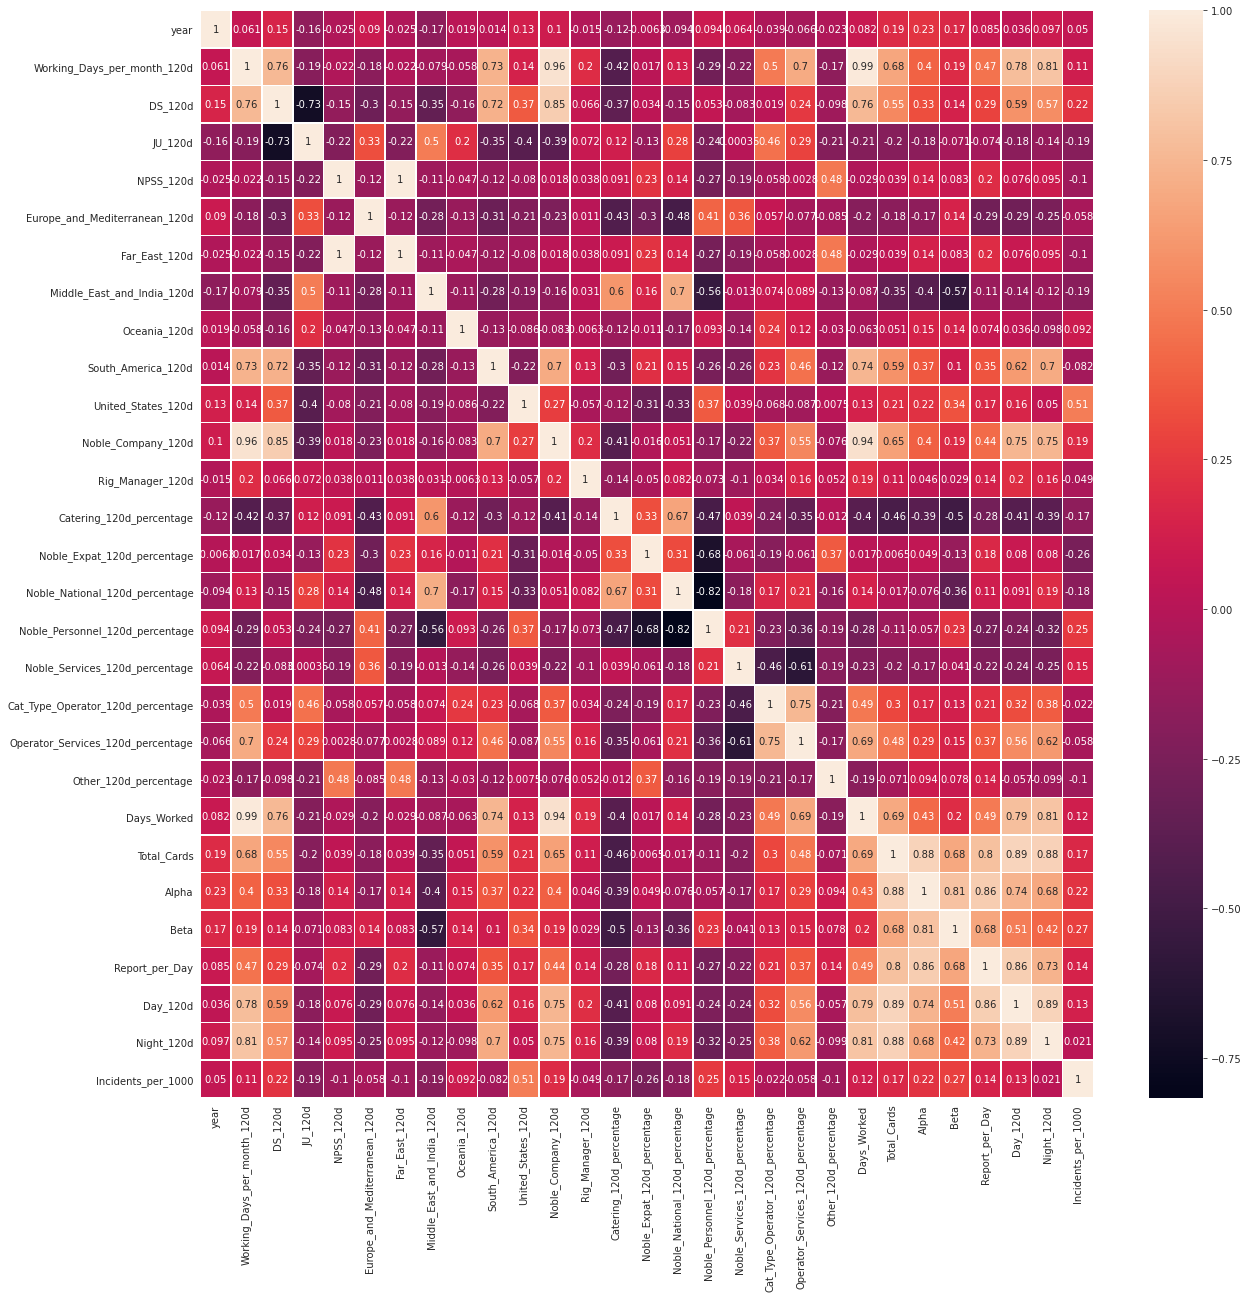

In [83]:
from functions import corrMatrix
corrMatrix(full_extra_pob_hse_year_month,"CorrMatrix_full_extra")

Saving figure CorrMatrix_full_full


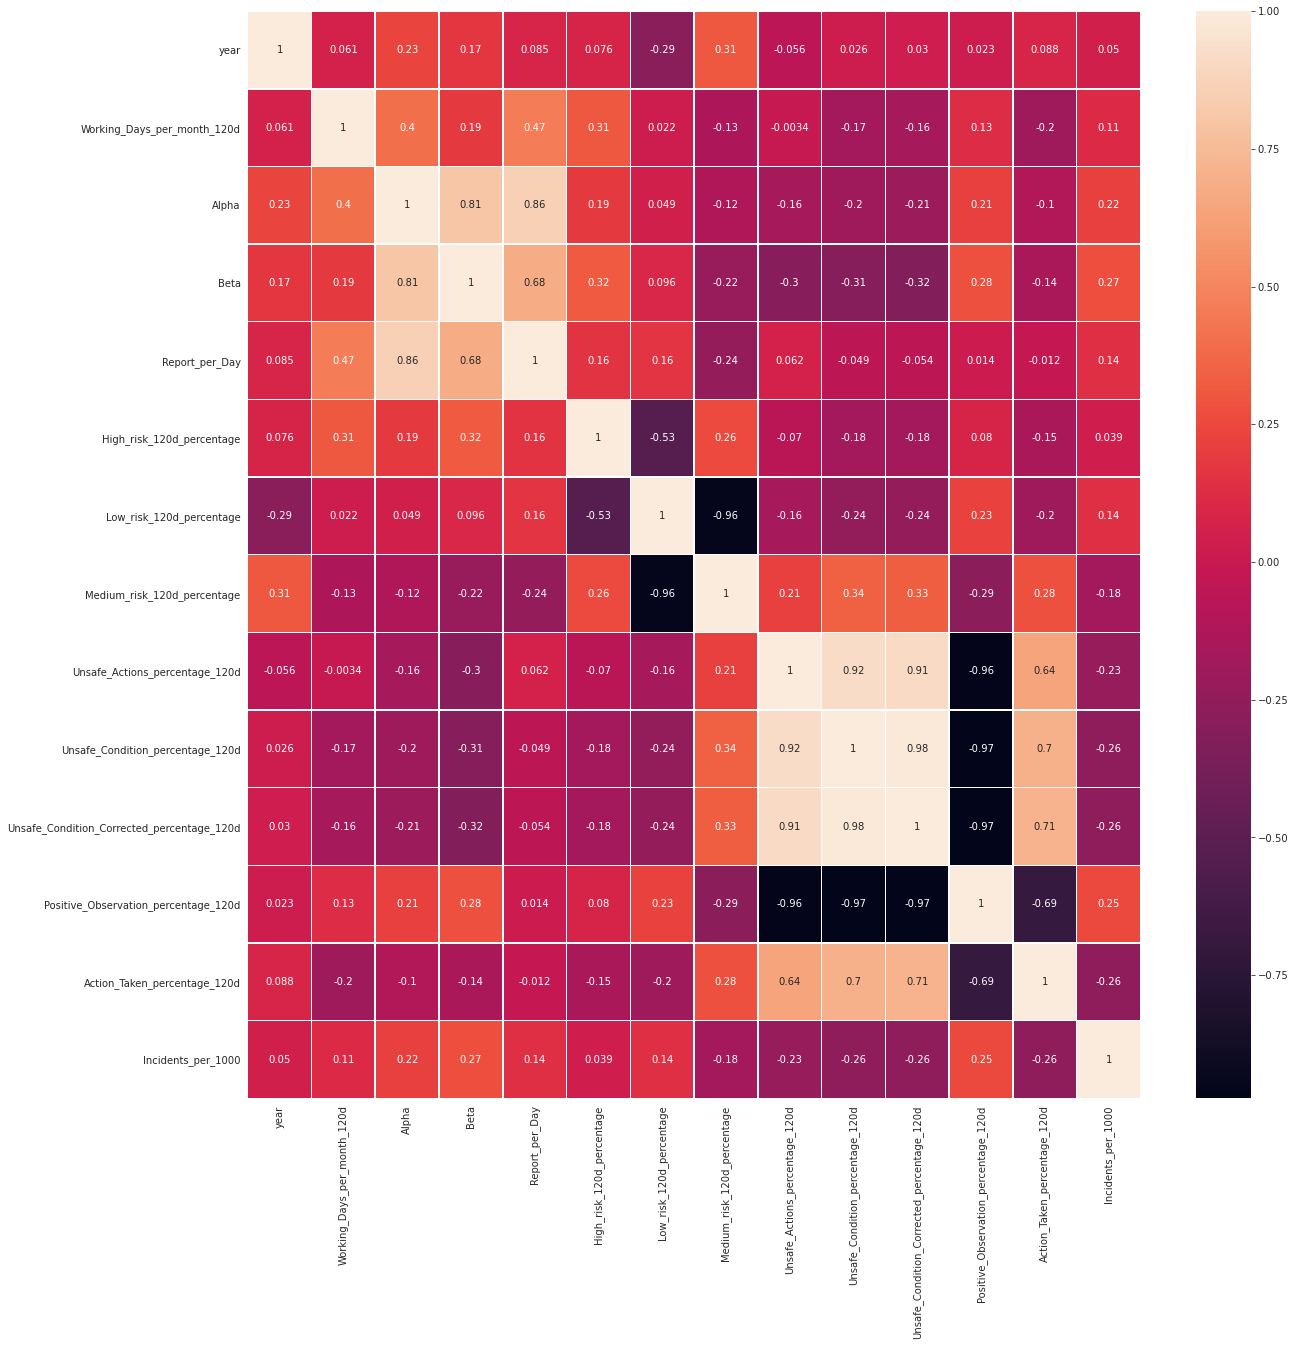

In [84]:
corrMatrix(full_full,"CorrMatrix_full_full")


Saving figure CorrMatrix_full_rm


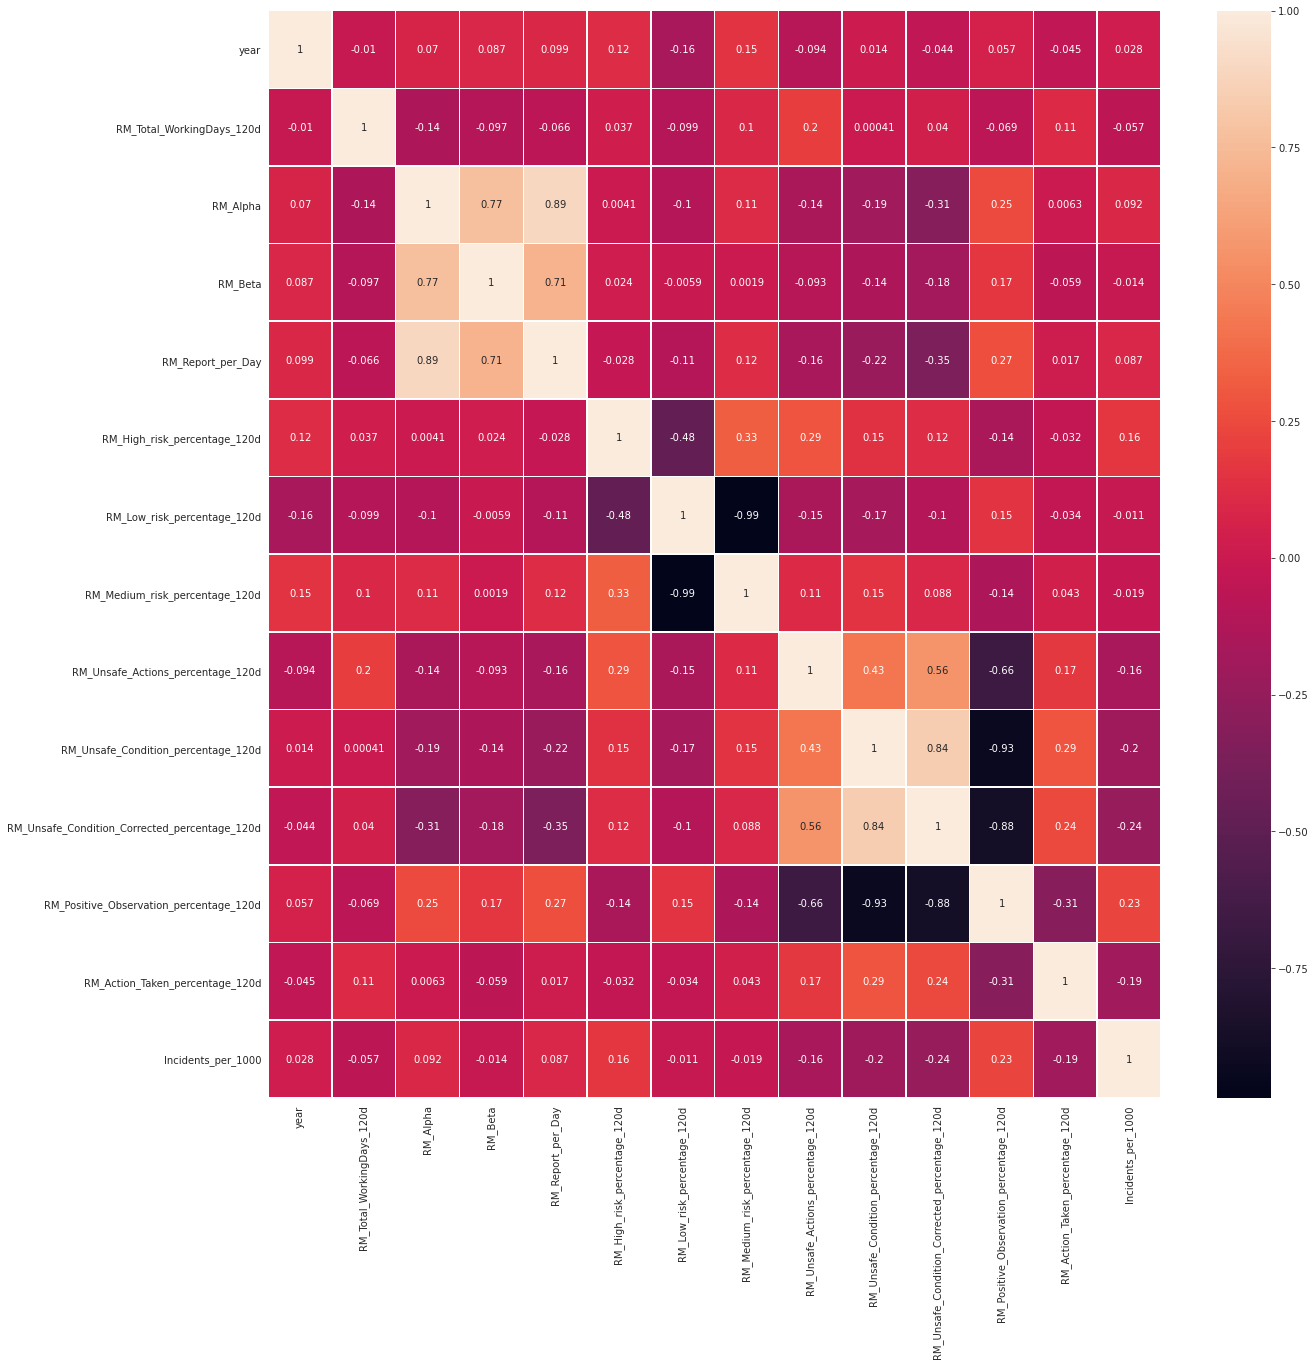

In [85]:
corrMatrix(full_rm,"CorrMatrix_full_rm")


Saving figure CorrMatrix_full_with_rm


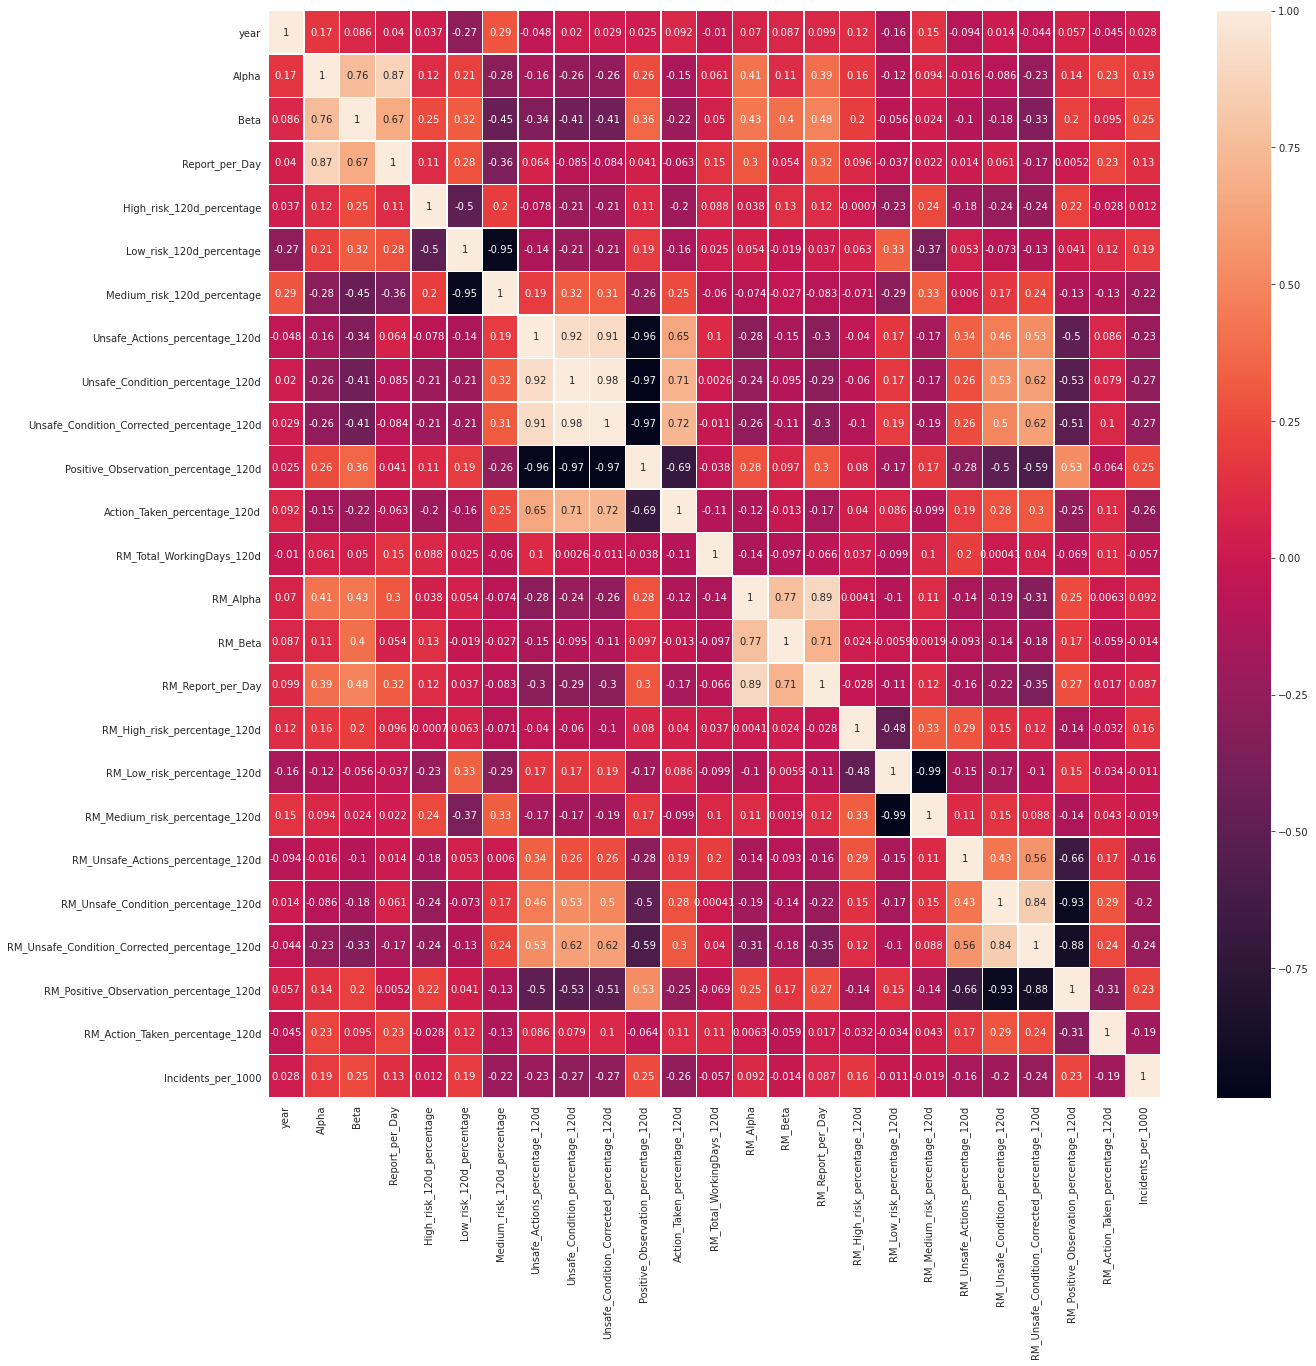

In [86]:
corrMatrix(full_with_rm,"CorrMatrix_full_with_rm")

In [73]:
full_full['Incidents_per_1000'].corr(full_full['Action_Taken_percentage_120d'])
full_full['Incidents_per_1000'].corr(full_full['Alpha'])


-0.25776290323900114

0.2208947253150006

In [154]:
# Export ready pre processed Dataset with all positions
#full_full.to_csv("./Datasets/Pre_processing_done.csv")
full_full.to_csv("./Datasets/Pre_processing_done_ohe.csv")

# Export ready pre processed Dataset only with RM data
full_rm.to_csv("./Datasets/Pre_processing_RM_done.csv")

# Export ready pre processed Dataset with all positions and RM data
#full_with_rm.to_csv("./Datasets/Pre_processing_ALL.csv")
full_with_rm.to_csv("./Datasets/Pre_processing_ALL_ohe.csv")

# Export ready pre processed Dataset only with RM data
full_extra_pob_hse_year_month.to_csv("./Datasets/Pre_processing_extra_done.csv")

In [155]:
full_full
full_rm

,year,month_year,Working_Days_per_month_120d,Alpha,Beta,Report_per_Day,High_risk_120d_percentage,Low_risk_120d_percentage,Medium_risk_120d_percentage,Unsafe_Actions_percentage_120d,Unsafe_Condition_percentage_120d,Unsafe_Condition_Corrected_percentage_120d,Positive_Observation_percentage_120d,Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,16506.0,-0.706365,0.445779,0.559251,0.023183,0.894161,0.082656,0.039324,0.039866,0.052757,0.928610,0.463763,0.060584
7,2021,2021-05,16512.0,-0.469006,0.541805,0.927386,0.019722,0.909489,0.070790,0.038529,0.038268,0.048847,0.931561,0.454385,0.000000
8,2021,2021-06,17206.0,-0.185492,0.582899,1.077647,0.018283,0.909071,0.072646,0.038238,0.042552,0.049078,0.927893,0.443534,0.058119
9,2021,2021-07,16726.0,-0.003215,0.540605,1.084659,0.024198,0.899515,0.076287,0.048010,0.052751,0.054790,0.922500,0.425973,0.059787
10,2021,2021-08,16384.0,-0.001977,0.511881,1.114380,0.063862,0.828404,0.107734,0.171486,0.142458,0.135283,0.822653,0.416968,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,10313.0,-0.135877,0.700201,0.903908,0.010513,0.899378,0.090109,0.042909,0.070371,0.071229,0.897554,0.560073,0.484825
342,2021,2021-12,10521.0,-0.160332,0.690719,0.870735,0.015610,0.870647,0.113743,0.060692,0.084161,0.081323,0.875450,0.565659,0.570288
343,2022,2022-01,9172.0,-0.214469,0.746363,0.840057,0.021804,0.844776,0.133420,0.072031,0.106165,0.092667,0.849189,0.555354,0.545137
344,2022,2022-02,8609.0,-0.245051,0.715332,0.818678,0.026532,0.829030,0.144438,0.080165,0.113365,0.102015,0.836975,0.593927,0.580788


,year,month_year,RM_Total_WorkingDays_120d,RM_Alpha,RM_Beta,RM_Report_per_Day,RM_High_risk_percentage_120d,RM_Low_risk_percentage_120d,RM_Medium_risk_percentage_120d,RM_Unsafe_Actions_percentage_120d,RM_Unsafe_Condition_percentage_120d,RM_Unsafe_Condition_Corrected_percentage_120d,RM_Positive_Observation_percentage_120d,RM_Action_Taken_percentage_120d,Incidents_per_1000
6,2021,2021-04,94.0,-0.408140,0.915723,0.893617,0.000000,0.535714,0.464286,0.035714,0.047619,0.047619,0.904762,0.952381,0.060584
7,2021,2021-05,93.0,-0.044404,0.973751,1.247312,0.000000,0.663793,0.336207,0.034483,0.043103,0.034483,0.913793,0.956897,0.000000
8,2021,2021-06,92.0,0.067696,0.851494,1.250000,0.000000,0.791304,0.208696,0.034783,0.043478,0.026087,0.930435,0.956522,0.058119
9,2021,2021-07,93.0,0.286694,0.787907,0.989247,0.000000,0.934783,0.065217,0.032609,0.010870,0.000000,0.967391,0.989130,0.059787
10,2021,2021-08,95.0,0.066898,0.697825,0.936842,0.056180,0.865169,0.078652,0.112360,0.101124,0.044944,0.887640,0.966292,0.061035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2021,2021-11,92.0,0.280273,0.568201,0.706522,0.092308,0.215385,0.692308,0.292308,0.138462,0.276923,0.692308,0.307692,0.484825
342,2021,2021-12,91.0,-0.050063,0.501254,0.692308,0.142857,0.174603,0.682540,0.317460,0.222222,0.333333,0.634921,0.380952,0.570288
343,2022,2022-01,93.0,-0.680549,0.714228,0.505376,0.234043,0.106383,0.659574,0.361702,0.276596,0.404255,0.574468,0.468085,0.545137
344,2022,2022-02,93.0,-0.573805,0.829101,0.526882,0.326531,0.122449,0.551020,0.408163,0.346939,0.469388,0.510204,0.571429,0.580788


### Near Miss Data

In [17]:
near_miss = pd.read_csv("./Datasets/Near_Miss_Events.csv", index_col = 0)
near_miss = near_miss.reset_index(drop=True)
near_miss

,Date - Month Name,Event Date Time,Proportional Work Hours,Supervisor Yrs Exp,Form ID
0,January,08/01/2014,409.333,2.0,20140109132622
1,January,16/01/2014,604.000,9.0,20140116033257
2,January,19/01/2014,296.000,0.0,20140119122156
3,January,23/01/2014,688.000,11.0,20140124053342
4,January,30/01/2014,604.000,0.0,20140130130756
...,...,...,...,...,...
1695,July,01/07/2022,1544.000,10.0,20220701093126
1696,July,04/07/2022,1544.000,10.0,20220704113018
1697,July,09/07/2022,1468.000,9.0,20220709145219
1698,July,11/07/2022,432.000,11.0,20220711094723


In [18]:
from functions import share_missing_values
share_missing_values(near_miss)

,share_of_missing_values,count_of_unique_values
Supervisor Yrs Exp,16.18%,12
Date - Month Name,0.0%,12
Event Date Time,0.0%,1210
Proportional Work Hours,0.0%,444
Form ID,0.0%,1700


In [19]:
#Convert Date column to datetime type for easier manipulations 
near_miss['Date']= pd.to_datetime(near_miss['Event Date Time'])
near_miss = near_miss.drop(columns={"Event Date Time"})

#Extract year and add it to new column
near_miss['date_year_month'] = pd.to_datetime(near_miss['Date']).dt.strftime('%Y-%m')
near_miss['date_year'] = pd.to_datetime(near_miss['Date']).dt.year
near_miss['date_month'] = pd.to_datetime(near_miss['Date']).dt.month
near_miss['date_month_name'] = pd.to_datetime(near_miss['Date']).dt.month_name()

near_miss.head()



,Date - Month Name,Proportional Work Hours,Supervisor Yrs Exp,Form ID,Date,date_year_month,date_year,date_month,date_month_name
0,January,409.333,2.0,20140109132622,2014-08-01,2014-08,2014,8,August
1,January,604.000,9.0,20140116033257,2014-01-16,2014-01,2014,1,January
2,January,296.000,0.0,20140119122156,2014-01-19,2014-01,2014,1,January
3,January,688.000,11.0,20140124053342,2014-01-23,2014-01,2014,1,January
4,January,604.000,0.0,20140130130756,2014-01-30,2014-01,2014,1,January


In [20]:
df_near = near_miss.groupby(["date_year","date_year_month"]).sum().reset_index()
df_near = df_near.reset_index(drop=True)
df_near["date_year"] = df_near["date_year"].astype(int)

df_near = df_near[df_near["date_year_month"]>="2020-10"]
df_near = df_near.reset_index(drop=True)
df_near



,date_year,date_year_month,Proportional Work Hours,Supervisor Yrs Exp,Form ID,date_month
0,2020,2020-10,16821.0,140.0,404017307058062,200
1,2020,2020-11,12354.0,101.0,262612013231355,143
2,2020,2020-12,13070.0,81.0,262619821184537,156
3,2021,2021-01,13920.0,112.0,282943636649890,14
4,2021,2021-02,5975.0,58.0,121262306721004,12
5,2021,2021-03,8812.0,75.0,181892246745418,27
6,2021,2021-04,16716.0,127.0,303156825591762,60
7,2021,2021-05,14996.0,116.0,343579881165329,85
8,2021,2021-06,9048.0,92.0,202105977280916,60
9,2021,2021-07,7416.0,71.0,161685792775522,56


In [22]:
df_near_miss = near_miss.groupby(["date_year","date_year_month"]).size().reset_index()
df_near_miss = df_near_miss.rename(columns = {0:"Events_per_month"})
df_near_miss = df_near_miss.reset_index(drop=True)
df_near_miss["date_year"] = df_near_miss["date_year"].astype(int)

df_near_miss = df_near_miss[df_near_miss["date_year_month"]>="2020-10"]
df_near_miss = df_near_miss.reset_index(drop=True)


df_near_miss["Avg_Supervisor_Yrs_Exp"] = df_near["Supervisor Yrs Exp"]/df_near_miss["Events_per_month"]
df_near_miss["Avg_Proportional_Work_Hours"] = df_near["Proportional Work Hours"]/df_near_miss["Events_per_month"]
df_near_miss = df_near_miss.sort_values(by=["Events_per_month"])
df_near_miss


,date_year,date_year_month,Events_per_month,Avg_Supervisor_Yrs_Exp,Avg_Proportional_Work_Hours
24,2022,2022-10,1,2.000000,808.000000
26,2022,2022-12,3,5.666667,1165.333333
23,2022,2022-09,3,10.000000,1058.666667
25,2022,2022-11,3,3.666667,629.333333
22,2022,2022-08,4,2.500000,774.500000
15,2022,2022-01,4,7.750000,1394.000000
21,2022,2022-07,4,5.250000,1261.000000
18,2022,2022-04,6,8.166667,1386.000000
4,2021,2021-02,6,9.666667,995.833333
14,2021,2021-12,7,7.428571,1076.000000


<Figure size 1080x576 with 0 Axes>

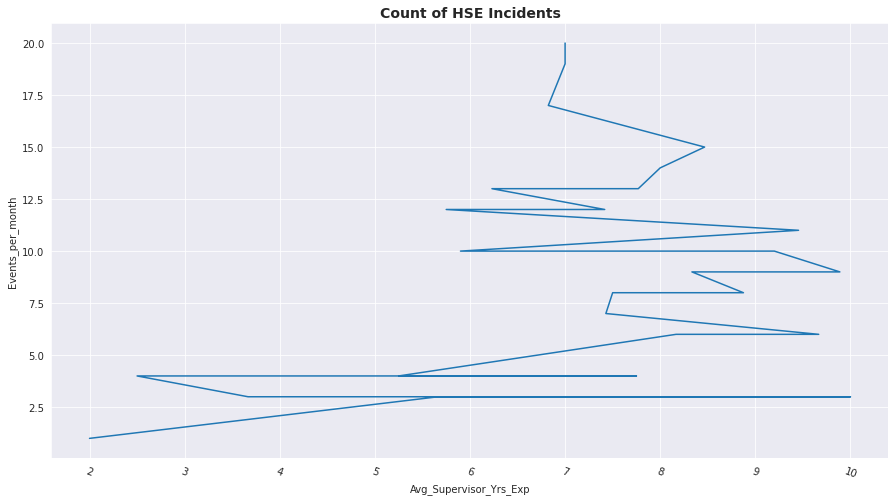

In [26]:
plt.figure(figsize=(15,8))
plt.plot(df_near_miss["Avg_Supervisor_Yrs_Exp"], df_near_miss["Events_per_month"])

_ = plt.xlabel("Avg_Supervisor_Yrs_Exp")
_ = plt.ylabel("Events_per_month")
_ = plt.title("Count of HSE Incidents", fontweight='bold', fontsize=14)
_ = plt.xticks(rotation=-20)